In [1]:
#*******************************
# Name: Jonah Zembower
# Date: December 15, 2024
# Project: This project looks at the acute-chrnoic workload ratio on the individuals of the womne's lacrosse team at Seton Hill University.
#*******************************

# Libraries and Data Preparation

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

In [3]:
# Loading the data using Windows Computer
players = pd.read_excel('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Lacrosse Research\\Lacrosse-Capstone-Data.xlsx')
players

Subject            name        date  Session Distance (mi)  \
0          1  Alaina TeSelle  2022-10-29                   0.02   
1          1  Alaina TeSelle  2023-01-18                   0.09   
2          1  Alaina TeSelle  2023-01-20                   0.02   
3          1  Alaina TeSelle  2023-01-23                   2.74   
4          1  Alaina TeSelle  2023-01-25                   3.29   
..       ...             ...         ...                    ...   
586       32      Tori Krapp  2024-02-13                   2.11   
587       32      Tori Krapp  2024-02-14                   1.61   
588       32      Tori Krapp  2024-02-20                   1.21   
589       32      Tori Krapp  2024-02-21                   0.07   
590       32      Tori Krapp  2024-02-23                   0.28   

     Session Active Time (min)  Session Load  Session Top Speed (ft/s)  \
0                         0.00           0.0                      1.39   
1                         1.28           0.0                      7.45   
2                         0.14           0.0                      9.05   
3                        24.94         118.2                     20.57   
4                        32.31         122.4                     19.98   
..                         ...           ...                       ...   
586                      20.74          31.9                     14.02   
587                      17.02          18.6                     12.04   
588                      10.78          63.8                     20.22   
589                       0.74           0.0                      5.45   
590                       3.09           0.4                      9.28   

     Session Peak Accel (m/s/s)  Session Peak Decel (m/s/s)  Sprints Count  \
0                          0.51                        0.40              0   
1                          2.94                        3.05              0   
2                          1.73                        3.43              0   
3                          4.50                        3.58             14   
4                          4.31                        4.02              7   
..                          ...                         ...            ...   
586                        2.48                        2.29              0   
587                        1.86                        1.62              0   
588                        2.90                        3.93             12   
589                        1.44                        1.39              0   
590                        1.65                        1.84              0   

     ...  Accel/Decel Zones Decel -1m/s/s  Accel/Decel Zones Decel -2m/s/s  \
0    ...                                0                                0   
1    ...                               12                                1   
2    ...                                2                                0   
3    ...                               99                               21   
4    ...                              161                               79   
..   ...                              ...                              ...   
586  ...                               16                                3   
587  ...                               11                                0   
588  ...                               20                                6   
589  ...                                5                                0   
590  ...                               14                                0   

     Accel/Decel Zones Decel -3m/s/s  Accel/Decel Zones Decel -4m/s/s  \
0                                  0                                0   
1                                  1                                0   
2                                  1                                0   
3                                  6                                0   
4                                 12                                1   

In [4]:
# Laoding the data using Mac Computer
# players = pd.read_excel('/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Coding Applications/Lacrosse Research/Lacrosse-Capstone-Data.xlsx')
# players

In [5]:
# Drop rows with null values
data_cleaned = players.dropna(subset=['Session Load'])

# Remove rows where Session Load is 0. Not useful to the data
data_cleaned = data_cleaned[data_cleaned['Session Load'] != 0]

data_cleaned

Subject            name        date  Session Distance (mi)  \
3          1  Alaina TeSelle  2023-01-23                   2.74   
4          1  Alaina TeSelle  2023-01-25                   3.29   
5          1  Alaina TeSelle  2023-01-27                   1.59   
6          1  Alaina TeSelle  2023-01-30                   2.79   
7          1  Alaina TeSelle  2023-02-01                   2.00   
..       ...             ...         ...                    ...   
585       32      Tori Krapp  2024-02-08                   1.89   
586       32      Tori Krapp  2024-02-13                   2.11   
587       32      Tori Krapp  2024-02-14                   1.61   
588       32      Tori Krapp  2024-02-20                   1.21   
590       32      Tori Krapp  2024-02-23                   0.28   

     Session Active Time (min)  Session Load  Session Top Speed (ft/s)  \
3                        24.94         118.2                     20.57   
4                        32.31         122.4                     19.98   
5                        15.64          37.6                     18.07   
6                        28.01          79.0                     22.14   
7                        19.96          36.8                     20.53   
..                         ...           ...                       ...   
585                      20.68          35.3                     21.36   
586                      20.74          31.9                     14.02   
587                      17.02          18.6                     12.04   
588                      10.78          63.8                     20.22   
590                       3.09           0.4                      9.28   

     Session Peak Accel (m/s/s)  Session Peak Decel (m/s/s)  Sprints Count  \
3                          4.50                        3.58             14   
4                          4.31                        4.02              7   
5                          3.97                        4.06              3   
6                          4.22                        4.70              4   
7                          4.16                        3.76              3   
..                          ...                         ...            ...   
585                        3.95                        5.33              5   
586                        2.48                        2.29              0   
587                        1.86                        1.62              0   
588                        2.90                        3.93             12   
590                        1.65                        1.84              0   

     ...  Accel/Decel Zones Decel -1m/s/s  Accel/Decel Zones Decel -2m/s/s  \
3    ...                               99                               21   
4    ...                              161                               79   
5    ...                               96                               32   
6    ...                              113                               37   
7    ...                               73                               11   
..   ...                              ...                              ...   
585  ...                               79                               31   
586  ...                               16                                3   
587  ...                               11                                0   
588  ...                               20                                6   
590  ...                               14                                0   

     Accel/Decel Zones Decel -3m/s/s  Accel/Decel Zones Decel -4m/s/s  \
3                                  6                                0   
4                                 12                                1   
5                                  8                                1   
6                                  9                                3   
7                                  4                                0   

# Data Exploration

Using the session load statistic determined by Titan Software to go about finding the training load. 

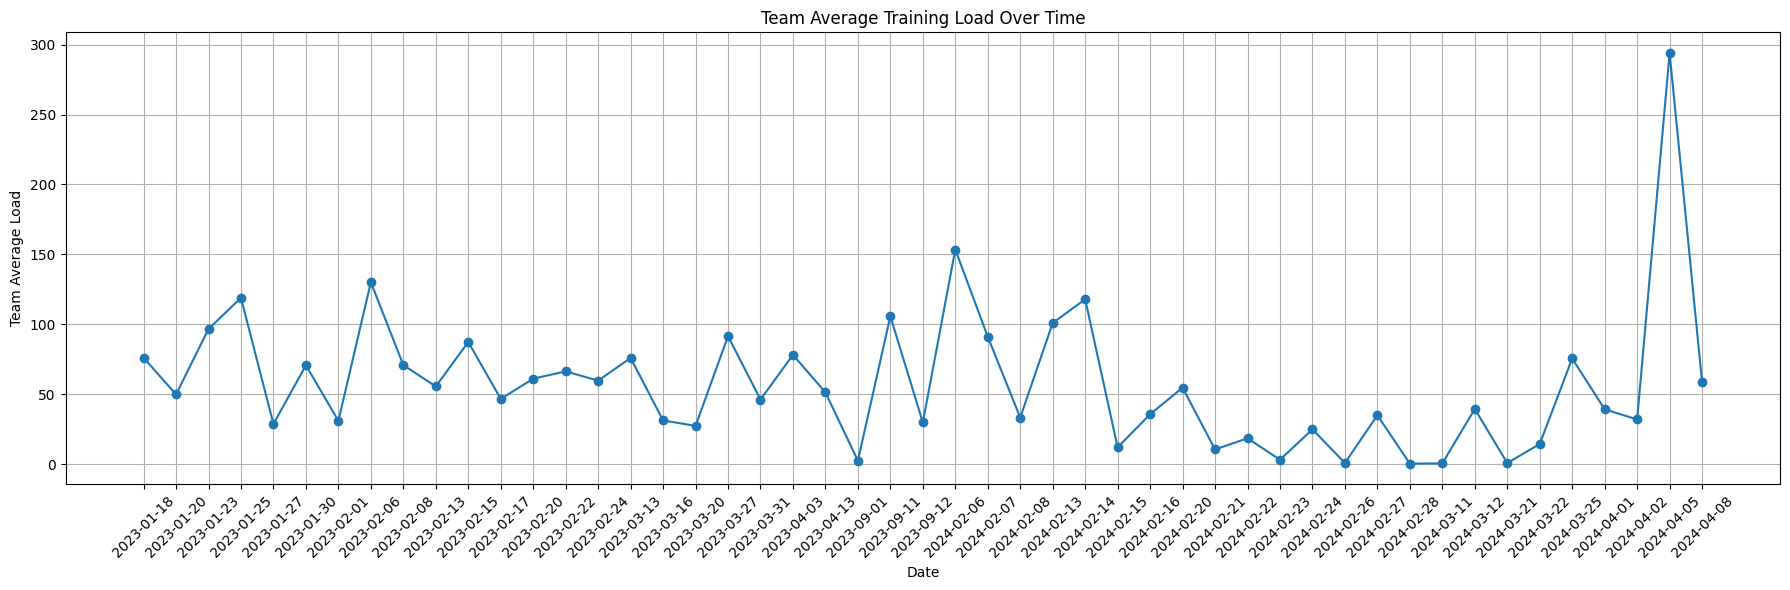

In [6]:
# Calculate the team average Session Load for each date of training session
team_average_load = data_cleaned.groupby('date')['Session Load'].mean().reset_index()

# Plot the team average Session Load
plt.figure(figsize=(18, 6))
plt.plot(team_average_load['date'], team_average_load['Session Load'], marker='o', linestyle='-')

# Customize the plot
plt.title('Team Average Training Load Over Time')
plt.xlabel('Date')
plt.ylabel('Team Average Load')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

I wonder why April 5th is so high, it may be an outlier. I am going to remove it initially. I plan to test the leverage of the data points on the graph here soon. 

In [7]:
# Check the data for April 5th and clean if necessary
april_5_data = data_cleaned[data_cleaned['date'] == '2024-04-05']
april_5_data

Subject             name        date  Session Distance (mi)  \
180       10  Ella Wroblewski  2024-04-05                    4.0   

     Session Active Time (min)  Session Load  Session Top Speed (ft/s)  \
180                      35.91         294.1                     24.47   

     Session Peak Accel (m/s/s)  Session Peak Decel (m/s/s)  Sprints Count  \
180                        4.62                        6.46             41   

     ...  Accel/Decel Zones Decel -1m/s/s  Accel/Decel Zones Decel -2m/s/s  \
180  ...                               89                               46   

     Accel/Decel Zones Decel -3m/s/s  Accel/Decel Zones Decel -4m/s/s  \
180                               19                               12   

     Accel/Decel Zones Decel -5m/s/s  Accel/Decel Zones Accel 1m/s/s  \
180                                3                              98   

     Accel/Decel Zones Accel 2m/s/s  Accel/Decel Zones Accel 3m/s/s  \
180                              57                              35   

     Accel/Decel Zones Accel 4m/s/s  Accel/Decel Zones Accel 5m/s/s  
180                              10                               0  

[1 rows x 54 columns]

In [8]:
# Removing the outlier
# Remove the data for April 5th, 2024
# Remove the data from the other dates since the lacrosse group took over
data = data_cleaned[data_cleaned['date'] != '2024-04-05']
data = data[data['date'] != '2023-09-11']
data = data[data['date'] != '2023-09-01']


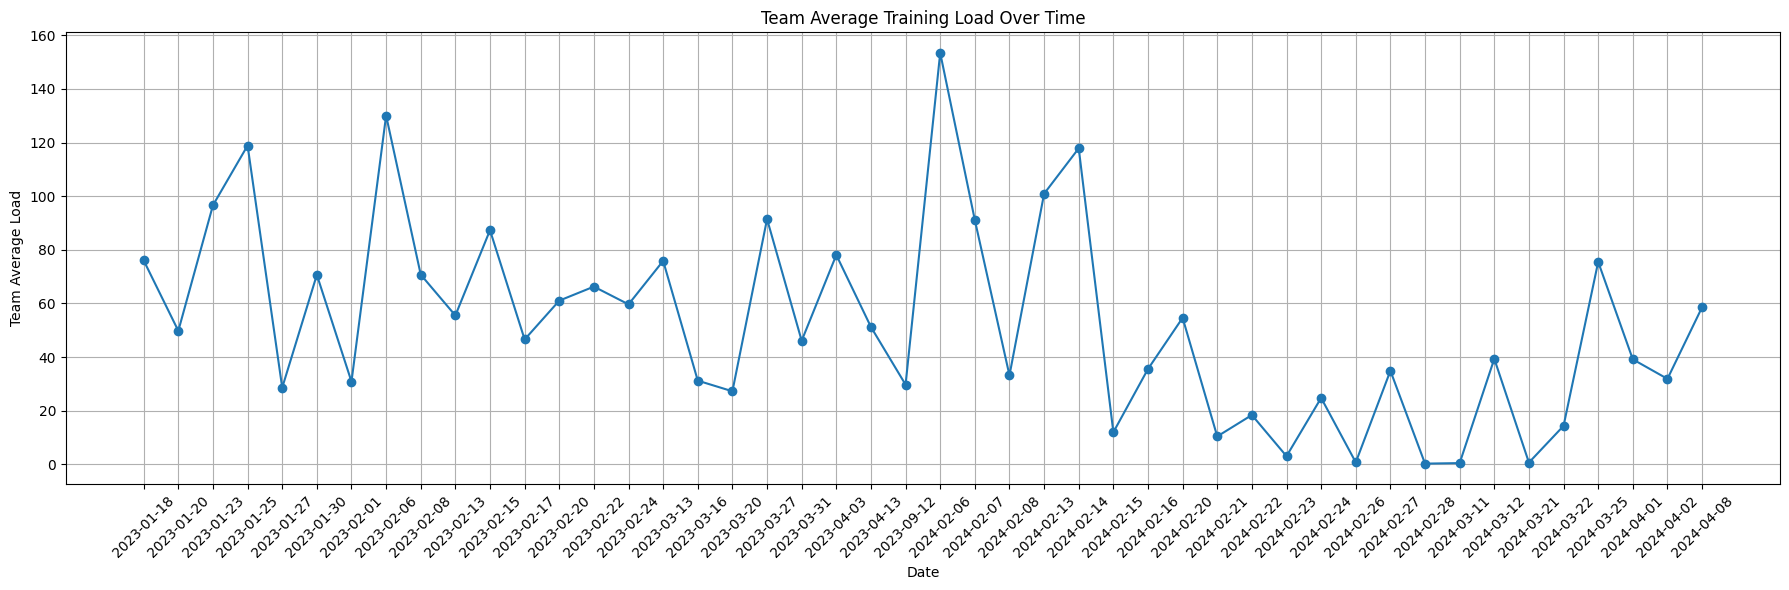

In [9]:
# Calculate the team average Session Load for each date of training session
team_average_load = data.groupby('date')['Session Load'].mean().reset_index()

# Plot the team average Session Load
plt.figure(figsize=(18, 6))
plt.plot(team_average_load['date'], team_average_load['Session Load'], marker='o', linestyle='-')

# Customize the plot
plt.title('Team Average Training Load Over Time')
plt.xlabel('Date')
plt.ylabel('Team Average Load')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

This is better and more realistic for these athletes.

<Figure size 1800x800 with 0 Axes>

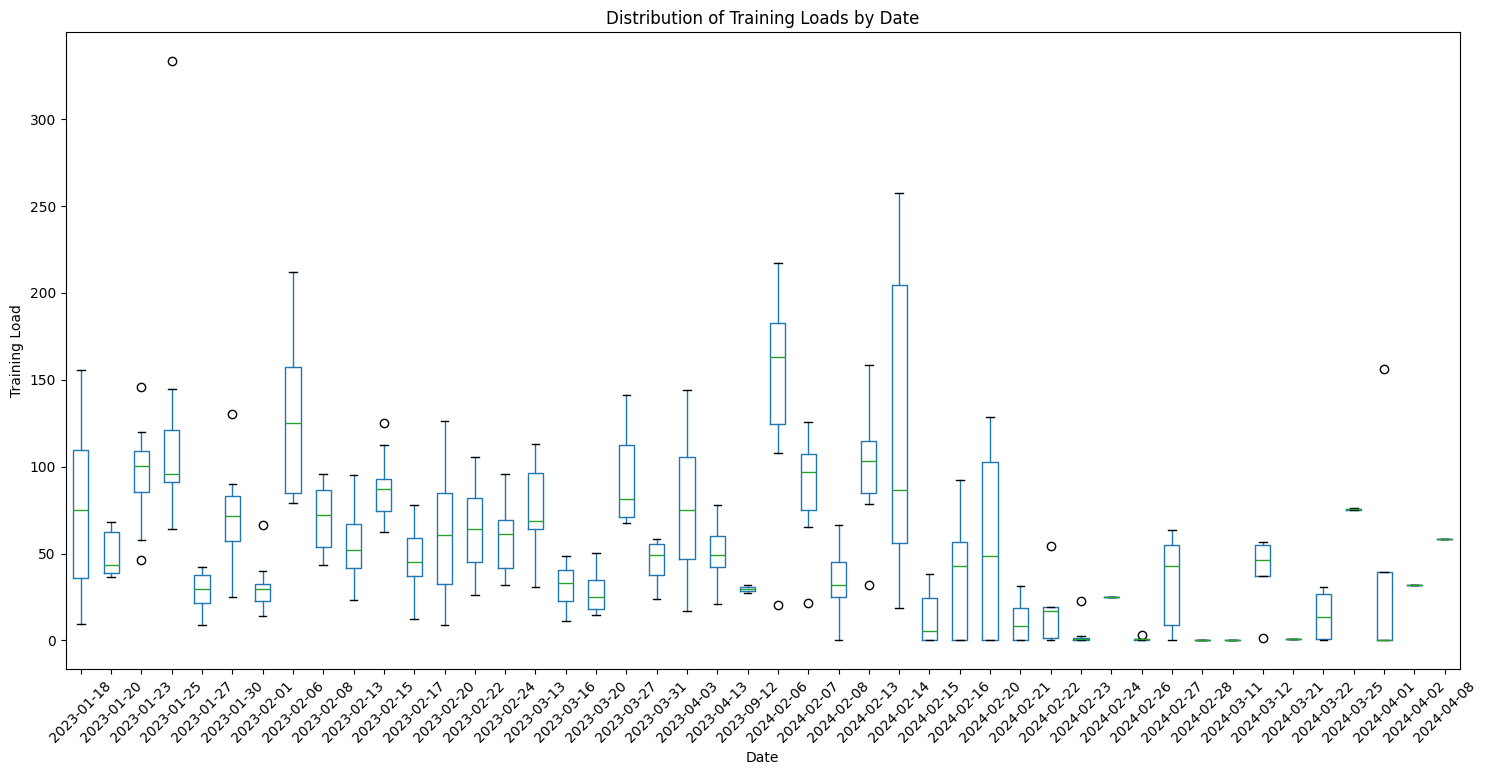

In [10]:
# Create a box plot to show the distribution of Session Load for all players on each date

plt.figure(figsize=(18, 8))

# Create a box plot for session load distribution by date
data.boxplot(column='Session Load', by='date', grid=False, vert=True, figsize=(15, 8))

# Customize the plot
plt.title('Distribution of Training Loads by Date')
plt.suptitle('')  # Remove default boxplot title
plt.xlabel('Date')
plt.ylabel('Training Load')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

Now assessing whether the data is normally distributed

In [11]:
# Perform a Shapiro-Wilk test for normality on the "Session Load" column
session_load_data = data['Session Load']

# Shapiro-Wilk test
shapiro_test_stat, shapiro_p_value = shapiro(session_load_data)

# Display results
{
    "Shapiro-Wilk Test Statistic": shapiro_test_stat,
    "p-value": shapiro_p_value
}

if shapiro_p_value > 0.05:
    print('The data is normally distributed')
    print('The test statistic is:', shapiro_test_stat)
    print('The p-value is:', shapiro_p_value)
else: 
    print('The data is not normally distributed')
    print('The test statistic is:', shapiro_test_stat)
    print('The p-value is:', shapiro_p_value)

The data is not normally distributed
The test statistic is: 0.9162883187509103
The p-value is: 1.5861575221153435e-16


So, the assumption of normality doesn't apply for this data. Proceed by performing a t-test. We assumed that since the data samples were realistically going to be less than 30, we would need to proceed without the use of a normal distribution, and this affirms that.

In [12]:
# If in windows, use the following code
data_uncleaned = pd.read_excel('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Lacrosse Research\\Lacrosse-Capstone-Data.xlsx')

In [13]:
# If in Mac, use the following code
# data_uncleaned = pd.read_excel('/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Coding Applications/Lacrosse Research/Lacrosse-Capstone-Data.xlsx')


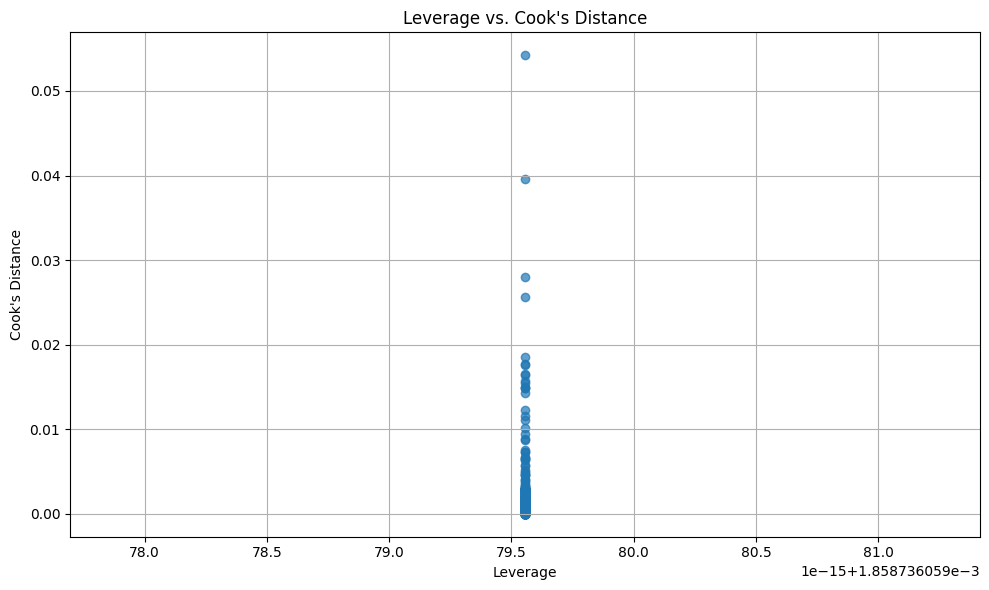

Leverage  Cook's Distance  Standardized Residuals
count  5.380000e+02     5.380000e+02            5.380000e+02
mean   1.858736e-03     1.862197e-03           -4.160241e-16
std    1.029309e-19     4.167619e-03            1.000931e+00
min    1.858736e-03     3.935601e-10           -1.250147e+00
25%    1.858736e-03     1.987002e-04           -6.687246e-01
50%    1.858736e-03     7.281278e-04           -1.780559e-01
75%    1.858736e-03     2.060600e-03            5.384999e-01
max    1.858736e-03     5.421766e-02            5.395821e+00

In [14]:
# Drop rows with null values
data_uncleaned = players.dropna(subset=['Session Load'])

# Remove rows where Session Load is 0. Not useful to the data
data_uncleaned = data_cleaned[data_cleaned['Session Load'] != 0]

# Add a constant to the data for leverage calculations
data_uncleaned['const'] = 1

# Fit an ordinary least squares (OLS) regression model using "Session Load" as the dependent variable
ols_model = sm.OLS(data_uncleaned['Session Load'], data_uncleaned[['const']]).fit()

# Obtain influence measures to check leverage, Cook's distance, and standardized residuals
influence = ols_model.get_influence()
leverage = influence.hat_matrix_diag
cooks_distance = influence.cooks_distance[0]
standardized_residuals = influence.resid_studentized_internal

# Combine results for easier analysis
assumptions_data = data_uncleaned.copy()
assumptions_data['Leverage'] = leverage
assumptions_data['Cook\'s Distance'] = cooks_distance
assumptions_data['Standardized Residuals'] = standardized_residuals

# Plot leverage vs. Cook's distance to identify high-influence points
plt.figure(figsize=(10, 6))
plt.scatter(leverage, cooks_distance, alpha=0.7)
plt.title("Leverage vs. Cook's Distance")
plt.xlabel('Leverage')
plt.ylabel("Cook's Distance")
plt.grid(True)
plt.tight_layout()
plt.show()

# Display key summary statistics for assumptions
assumptions_summary = assumptions_data[['Leverage', "Cook's Distance", 'Standardized Residuals']].describe()
assumptions_summary

- Leverage

	•	Definition: Leverage measures the influence of each data point on the regression model’s fitted values. Points with high leverage can disproportionately affect the model’s results.

	•	Findings: The leverage values are consistently low (mean: ~0.0019, min: ~0.0019), indicating no single data point exerts undue influence on the model’s predictions. This suggests that the dataset is relatively stable with respect to individual points.

- Cook’s Distance

	•	Definition: Cook’s distance identifies points that have a significant influence on the fitted regression model by considering both leverage and residual size.

	•	Findings:
	•	Most Cook’s distance values are very small (mean: ~0.0019, min: ~3.94 × 10⁻¹⁰).

	•	Typically, a Cook’s distance value above 0.5 indicates a moderately influential point, while values above 1 suggest a highly influential point.

	•	In this dataset, Cook’s distances are well below these thresholds, implying that no data points are significantly distorting the model.

- Standardized Residuals

	•	Definition: Standardized residuals measure how far observed values deviate from predicted values, scaled by the standard deviation of residuals.

	•	Findings:

	•	Standardized residuals have a mean close to zero (as expected) and a standard deviation of ~1, which aligns with typical regression assumptions.

	•	The minimum residual (-1.25) indicates no extreme outliers, as residuals within ±2 are generally considered acceptable.

- Leverage vs. Cook’s Distance Scatter Plot

	•	Purpose: This plot visualizes how leverage interacts with Cook’s distance to identify high-influence points.

	•	Observations:

	•	The plot shows a tight clustering of points with low leverage and low Cook’s distance.

	•	No extreme outliers are present, suggesting the data points contribute evenly to the model.

- Implications for the Data

	1.	Stability: The low leverage and Cook’s distance values suggest that the dataset is stable, and no single point is unduly influencing the regression results.

	2.	Residuals: The distribution of standardized residuals supports the assumption that errors are approximately normally distributed and evenly spread.

	3.	Model Suitability: These findings imply that the data satisfies key assumptions for linear regression, such as the absence of high-influence points and reasonably well-behaved residuals.

- Recommendations

	•	Proceed with confidence in the model, as the diagnostics suggest the data is suitable for linear regression.
	
	•	If necessary, refine the model further to improve residual normality, as indicated by the Shapiro-Wilk test results. For example, consider transformations or a different regression technique for non-normal data.

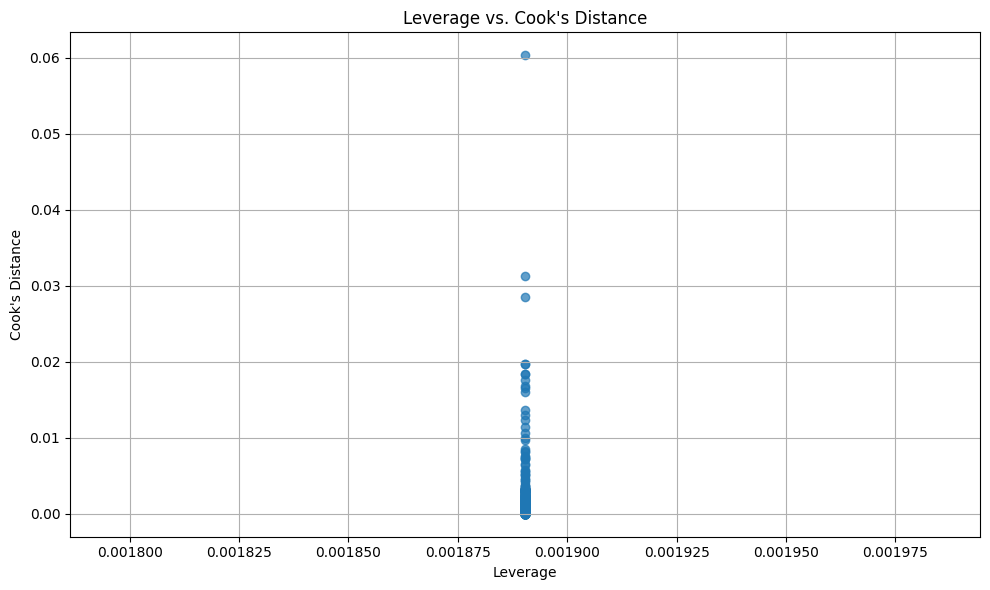

Leverage  Cook's Distance  Standardized Residuals
count  5.290000e+02     5.290000e+02            5.290000e+02
mean   1.890359e-03     1.893939e-03            4.432497e-16
std    4.373614e-19     4.136446e-03            1.000947e+00
min    1.890359e-03     5.979079e-09           -1.284806e+00
25%    1.890359e-03     2.145448e-04           -6.755230e-01
50%    1.890359e-03     7.761750e-04           -1.660544e-01
75%    1.890359e-03     2.215739e-03            5.721552e-01
max    1.890359e-03     6.033024e-02            5.643967e+00

In [15]:
# Add a constant to the data for leverage calculations
data['const'] = 1

# Fit an ordinary least squares (OLS) regression model using "Session Load" as the dependent variable
ols_model = sm.OLS(data['Session Load'], data[['const']]).fit()

# Obtain influence measures to check leverage, Cook's distance, and standardized residuals
influence = ols_model.get_influence()
leverage = influence.hat_matrix_diag
cooks_distance = influence.cooks_distance[0]
standardized_residuals = influence.resid_studentized_internal

# Combine results for easier analysis
assumptions_data = data.copy()
assumptions_data['Leverage'] = leverage
assumptions_data['Cook\'s Distance'] = cooks_distance
assumptions_data['Standardized Residuals'] = standardized_residuals

# Plot leverage vs. Cook's distance to identify high-influence points
plt.figure(figsize=(10, 6))
plt.scatter(leverage, cooks_distance, alpha=0.7)
plt.title("Leverage vs. Cook's Distance")
plt.xlabel('Leverage')
plt.ylabel("Cook's Distance")
plt.grid(True)
plt.tight_layout()
plt.show()

# Display key summary statistics for assumptions
assumptions_summary = assumptions_data[['Leverage', "Cook's Distance", 'Standardized Residuals']].describe()
assumptions_summary


- The analysis was performed on the cleaned dataset (excluding some data for research purposes), and the following results were obtained:

- Leverage

	•	Definition: Leverage indicates the influence of individual data points on the regression model.

	•	Findings:

	•	The leverage values remain low (mean: ~0.0019), similar to the previous analysis. This shows no individual data point disproportionately impacts the model.

- Cook’s Distance

	•	Definition: Measures the overall influence of a data point, considering both leverage and residual size.

	•	Findings:

	•	Cook’s distance values are small (mean: ~0.0019), with no values exceeding thresholds of 0.5 or 1, indicating no points significantly distort the regression.

- Standardized Residuals

	•	Definition: Residuals normalized by their standard deviation.

	•	Findings:

	•	Residuals have a mean near zero, and the standard deviation aligns with expectations (~1).

	•	There are no extreme outliers, as residuals are within the acceptable range (±2).

- Scatter Plot of Leverage vs. Cook’s Distance

	•	Observations:
	
	•	The plot shows a tight cluster of points with low leverage and low Cook’s distance, similar to the uncleaned dataset. This suggests stable data points that evenly contribute to the regression model.

- Implications for the Cleaned Dataset

	1.	Stability: Like the original dataset, the cleaned dataset is robust, with no data points exerting undue influence.
	2.	Model Suitability: Regression assumptions are met, and the cleaned dataset is suitable for linear modeling.


Seeing the above using the constant, now instead we are going to look at multiple linear regression in prediction of the training load. We are going to assess these values and their relationship potentially with the model's training load.

I will use the Applied Statistics Method of doing analysis for multiple linear regression.

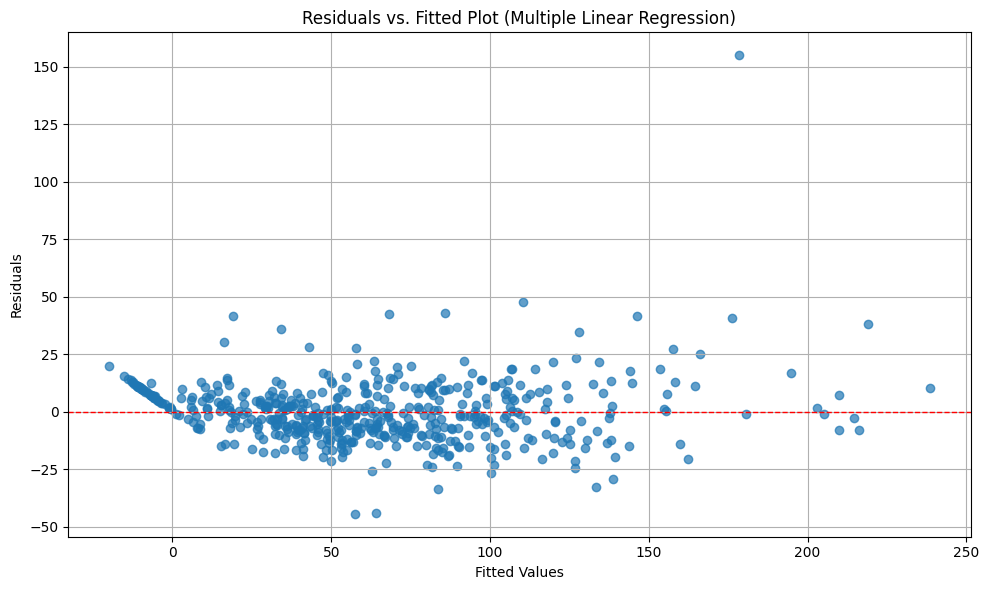

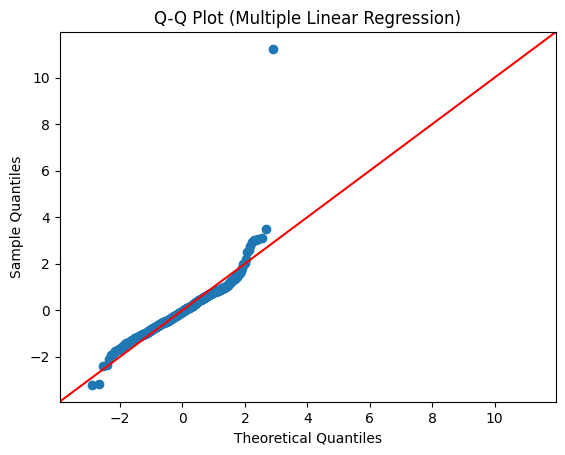

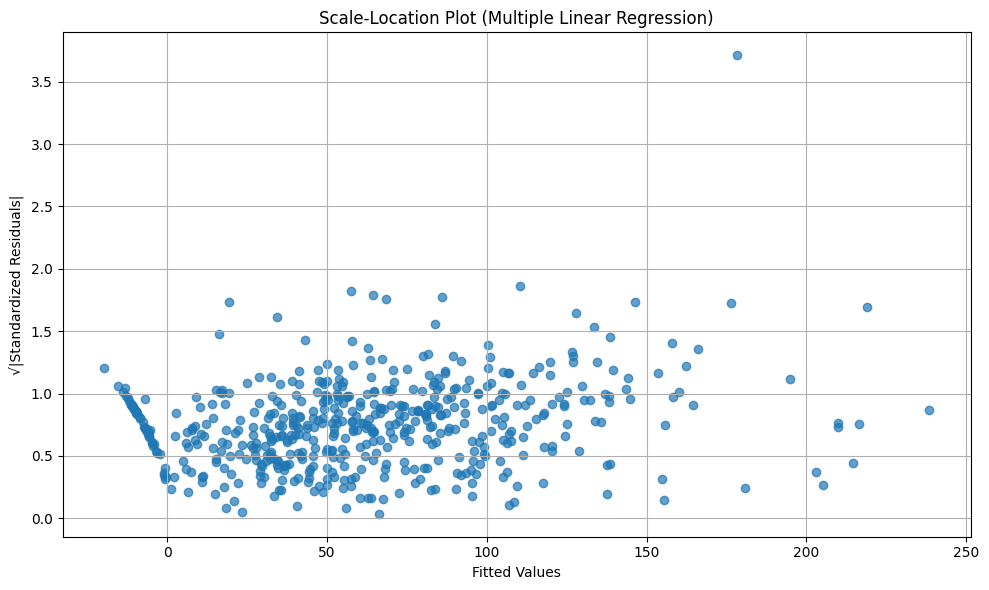

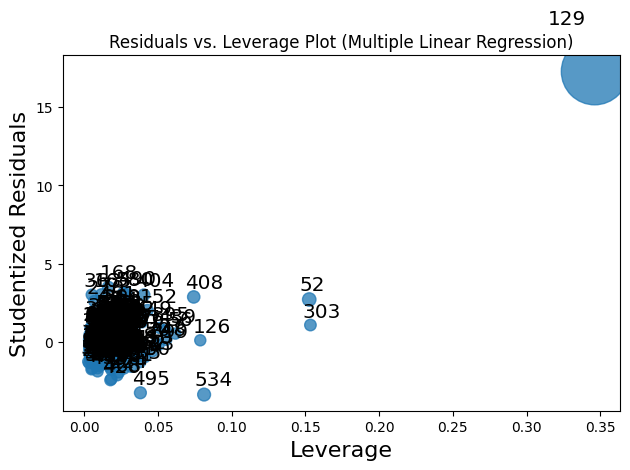

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Session Load   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     829.9
Date:                Fri, 20 Dec 2024   Prob (F-statistic):          7.95e-278
Time:                        12:12:45   Log-Likelihood:                -2138.9
No. Observations:                 529   AIC:                             4294.
Df Residuals:                     521   BIC:                             4328.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -24.5255      3.487     -7.033      0.000     -31.376     -17.675
Session Active Time (min)     -1.4769      0.407     -3.626      0.000      -2.277      -0.677
Session Top Speed (ft/s)       3.0524      0.247     12.371      0.000       2.568       3.537
Sprints Count                  0.7652      0.309      2.476      0.014       0.158       1.372
Session Distance (mi)         31.7594      4.349      7.303      0.000      23.216      40.302
Session Peak Accel (m/s/s)    -5.3380      1.122     -4.759      0.000      -7.541      -3.134
Session Peak Decel (m/s/s)    -3.0364      1.031     -2.946      0.003      -5.061      -1.012
Sprints Distance (yrd)         0.0853      0.007     12.669      0.000       0.072       0.098
==============================================================================
Omnibus:                      411.485   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20285.368
Skew:                           2.890   Prob(JB):                         0.00
Kurtosis:                      32.781   Cond. No.                     2.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# Selecting key predictor variables for multiple linear regression
# Using columns like 'Session Active Time (min)', 'Session Top Speed (ft/s)', and 'Sprints Count'
predictors = ['Session Active Time (min)', 'Session Top Speed (ft/s)', 'Sprints Count', 'Session Distance (mi)', 'Session Peak Accel (m/s/s)', 'Session Peak Decel (m/s/s)', 'Sprints Distance (yrd)' ]

# Dropping rows with missing data in the selected columns
mlr_data = data.dropna(subset=predictors)

# Adding a constant for the regression model
mlr_data['const'] = 1

# Fit the multiple linear regression model
mlr_model = sm.OLS(mlr_data['Session Load'], mlr_data[['const'] + predictors]).fit()

# Summary of the regression
mlr_summary = mlr_model.summary()

# Residual diagnostics for the multiple linear regression model
# Residuals vs. Fitted Plot
plt.figure(figsize=(10, 6))
plt.scatter(mlr_model.fittedvalues, mlr_model.resid, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs. Fitted Plot (Multiple Linear Regression)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

# Q-Q Plot
fig = sm.qqplot(mlr_model.resid, line='45', fit=True)
plt.title("Q-Q Plot (Multiple Linear Regression)")
plt.show()

# Scale-Location Plot
standardized_residuals_mlr = mlr_model.get_influence().resid_studentized_internal
plt.figure(figsize=(10, 6))
plt.scatter(mlr_model.fittedvalues, np.sqrt(np.abs(standardized_residuals_mlr)), alpha=0.7)
plt.title('Scale-Location Plot (Multiple Linear Regression)')
plt.xlabel('Fitted Values')
plt.ylabel('√|Standardized Residuals|')
plt.grid(True)
plt.tight_layout()
plt.show()

# Residuals vs. Leverage Plot
sm.graphics.influence_plot(mlr_model, criterion="cooks", alpha=0.7)
plt.title("Residuals vs. Leverage Plot (Multiple Linear Regression)")
plt.tight_layout()
plt.show()

# Display the regression summary
mlr_summary

Consider removing sprint count due to it not being statistically significant.

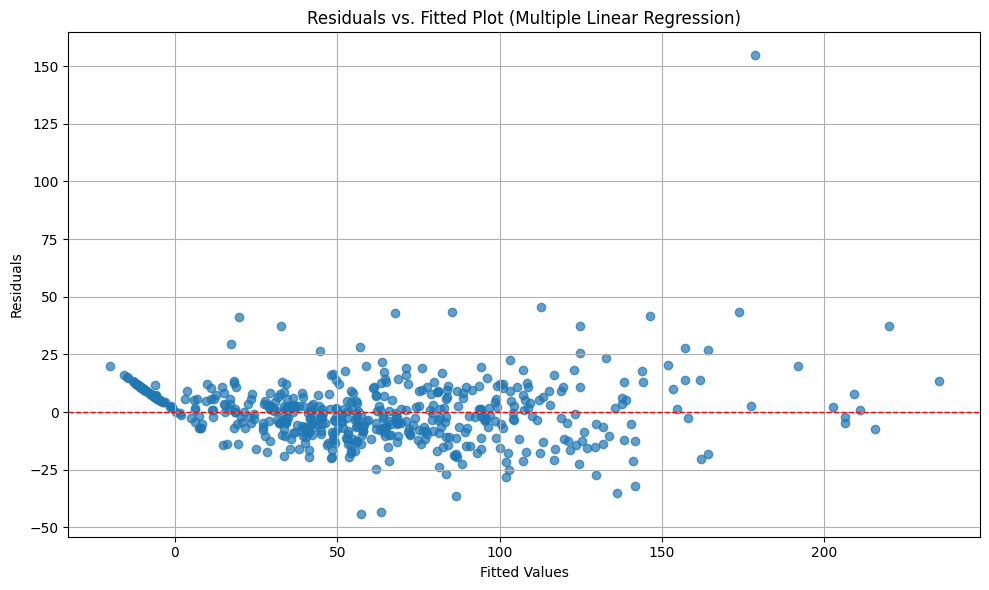

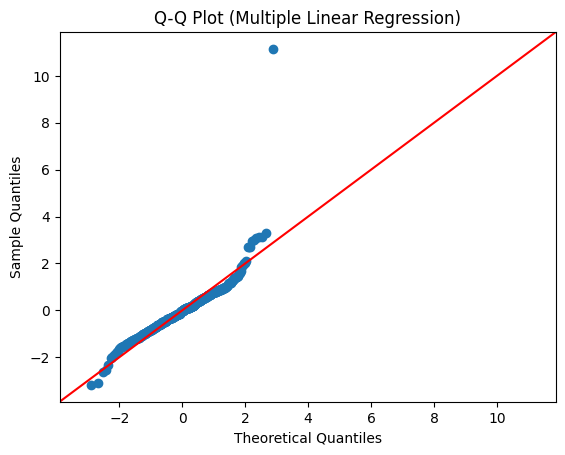

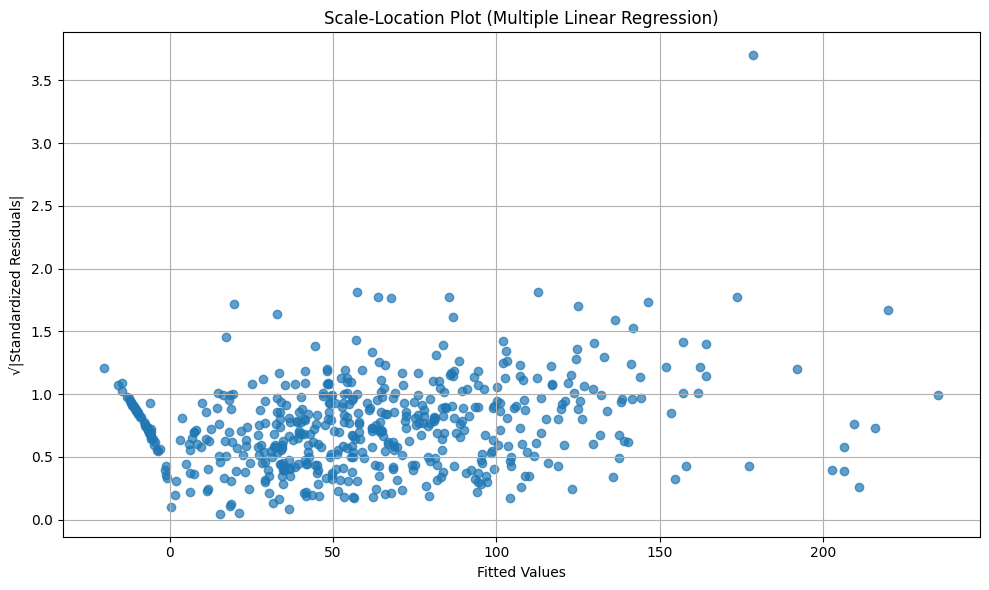

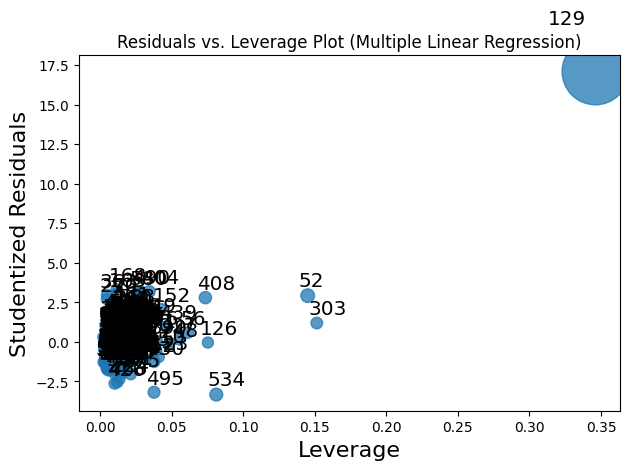

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Session Load   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     957.8
Date:                Fri, 20 Dec 2024   Prob (F-statistic):          5.17e-278
Time:                        12:12:46   Log-Likelihood:                -2142.0
No. Observations:                 529   AIC:                             4298.
Df Residuals:                     522   BIC:                             4328.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -25.6211      3.476     -7.371      0.000     -32.449     -18.793
Session Active Time (min)     -1.3961      0.408     -3.422      0.001      -2.198      -0.595
Session Top Speed (ft/s)       3.0708      0.248     12.391      0.000       2.584       3.558
Session Distance (mi)         31.2427      4.365      7.158      0.000      22.668      39.818
Session Peak Accel (m/s/s)    -5.6402      1.120     -5.034      0.000      -7.841      -3.439
Session Peak Decel (m/s/s)    -2.4971      1.012     -2.467      0.014      -4.486      -0.509
Sprints Distance (yrd)         0.1003      0.003     34.434      0.000       0.095       0.106
==============================================================================
Omnibus:                      402.745   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19237.699
Skew:                           2.802   Prob(JB):                         0.00
Kurtosis:                      32.006   Cond. No.                     2.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# Selecting key predictor variables for multiple linear regression
# Using columns like 'Session Active Time (min)', 'Session Top Speed (ft/s)', and 'Sprints Count'
predictors = ['Session Active Time (min)', 'Session Top Speed (ft/s)', 'Session Distance (mi)', 'Session Peak Accel (m/s/s)', 'Session Peak Decel (m/s/s)', 'Sprints Distance (yrd)' ]

# Dropping rows with missing data in the selected columns
mlr_data = data.dropna(subset=predictors)

# Adding a constant for the regression model
mlr_data['const'] = 1

# Fit the multiple linear regression model
mlr_model = sm.OLS(mlr_data['Session Load'], mlr_data[['const'] + predictors]).fit()

# Summary of the regression
mlr_summary = mlr_model.summary()

# Residual diagnostics for the multiple linear regression model
# Residuals vs. Fitted Plot
plt.figure(figsize=(10, 6))
plt.scatter(mlr_model.fittedvalues, mlr_model.resid, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs. Fitted Plot (Multiple Linear Regression)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

# Q-Q Plot
fig = sm.qqplot(mlr_model.resid, line='45', fit=True)
plt.title("Q-Q Plot (Multiple Linear Regression)")
plt.show()

# Scale-Location Plot
standardized_residuals_mlr = mlr_model.get_influence().resid_studentized_internal
plt.figure(figsize=(10, 6))
plt.scatter(mlr_model.fittedvalues, np.sqrt(np.abs(standardized_residuals_mlr)), alpha=0.7)
plt.title('Scale-Location Plot (Multiple Linear Regression)')
plt.xlabel('Fitted Values')
plt.ylabel('√|Standardized Residuals|')
plt.grid(True)
plt.tight_layout()
plt.show()

# Residuals vs. Leverage Plot
sm.graphics.influence_plot(mlr_model, criterion="cooks", alpha=0.7)
plt.title("Residuals vs. Leverage Plot (Multiple Linear Regression)")
plt.tight_layout()
plt.show()

# Display the regression summary
mlr_summary

This model appears to be more effective, but we need to check some other statistics of the predictors. Now checking multicolinearity.


In [18]:
# Explore multicollinearity among predictors using Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Variable"] = predictors
vif_data["VIF"] = [variance_inflation_factor(data[predictors].values, i) for i in range(len(predictors))]

# Display results
vif_data, mlr_summary

(                     Variable         VIF
 0   Session Active Time (min)  219.783387
 1    Session Top Speed (ft/s)   47.932246
 2       Session Distance (mi)  256.670595
 3  Session Peak Accel (m/s/s)   50.803102
 4  Session Peak Decel (m/s/s)   48.072377
 5      Sprints Distance (yrd)    3.211698,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:           Session Load   R-squared:                       0.917
 Model:                            OLS   Adj. R-squared:                  0.916
 Method:                 Least Squares   F-statistic:                     957.8
 Date:                Fri, 20 Dec 2024   Prob (F-statistic):          5.17e-278
 Time:                        12:12:46   Log-Likelihood:                -2142.0
 No. Observations:                 529   AIC:                             4298.
 Df Residuals:                     522   BIC:                             4328.
 Df Mode

There is clear multicolinearity with some values VIF > 10 that clearly portrays multicolinearity. I will now look at addressing this and see what we can do to change this.

Since all of the variables have high multicolinearity, it may be beneificial to do principal component analysis on them to split the data better into different practice types.

In [19]:
# Step 1: Address Multicollinearity by Applying PCA
# Standardize the predictors
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data[predictors])

# Apply PCA to reduce dimensions
pca = PCA(n_components=0.95)  # Retain 95% of variance
pca_data = pca.fit_transform(standardized_data)
pca_components = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_components['Session Load'] = data['Session Load'].reset_index(drop=True)

# Step 2: Fit Ridge Regression (less sensitive to multicollinearity)
ridge = Ridge(alpha=1.0)  # Regularization strength
ridge.fit(pca_components.iloc[:, :-1], pca_components['Session Load'])
ridge_coefficients = ridge.coef_

# Step 3: Fit Lasso Regression
lasso = Lasso(alpha=0.01)  # Regularization strength
lasso.fit(pca_components.iloc[:, :-1], pca_components['Session Load'])
lasso_coefficients = lasso.coef_

# Step 4: Re-run Multiple Linear Regression with PCA Components
pca_data_with_const = sm.add_constant(pca_components.iloc[:, :-1])
mlr_pca_model = sm.OLS(pca_components['Session Load'], pca_data_with_const).fit()

# Results
ridge_coefficients_summary = pd.DataFrame(ridge_coefficients, index=[f'PC{i+1}' for i in range(pca.n_components_)], columns=['Ridge Coefficients'])
lasso_coefficients_summary = pd.DataFrame(lasso_coefficients, index=[f'PC{i+1}' for i in range(pca.n_components_)], columns=['Lasso Coefficients'])

# Show Ridge, Lasso, and PCA Regression results
ridge_coefficients_summary, lasso_coefficients_summary, mlr_pca_model.summary()

(     Ridge Coefficients
 PC1           19.031001
 PC2          -12.822956
 PC3           28.063945
 PC4            4.830716,
      Lasso Coefficients
 PC1           19.037539
 PC2          -12.840671
 PC3           28.128545
 PC4            4.827683,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:           Session Load   R-squared:                       0.911
 Model:                            OLS   Adj. R-squared:                  0.911
 Method:                 Least Squares   F-statistic:                     1348.
 Date:                Fri, 20 Dec 2024   Prob (F-statistic):          3.44e-274
 Time:                        12:12:47   Log-Likelihood:                -2158.3
 No. Observations:                 529   AIC:                             4327.
 Df Residuals:                     524   BIC:                             4348.
 Df Model:                           4                    

1. Ridge and Lasso Regression Coefficients

	•	Ridge Regression:

	•	Coefficients for the principal components (PCs) indicate that PC1, PC2, and PC3 are the most influential components in explaining Session Load.

	•	The model is less sensitive to multicollinearity due to regularization.

	•	Lasso Regression:

	•	Similar coefficients to Ridge Regression, with some slight differences.

	•	Lasso can shrink some coefficients to zero, but here all components remain relevant.

2. PCA-Based Multiple Linear Regression

	•	R-squared: 0.911

	•	The PCA-based regression explains 91.1% of the variance in Session Load.

	•	Adjusted R-squared: 0.911

	•	Indicates that the model remains strong after reducing dimensions.

	•	Key Principal Components (PCs):

	•	PC1: Strong negative effect (+19.03).

	•	PC2: Strong positive effect (-12.82)

	•	PC3: Strongest negative effect (+28.06).
	
	•	PC4: Smaller positive effect (+4.83).

- Comparison

	•	Ridge, Lasso, and PCA-based regression all show similar results, confirming the robustness of the findings.

	•	Dimensionality reduction (PCA) effectively addresses multicollinearity, simplifying the model while retaining predictive power.

- Key Insights

	1.	Multicollinearity:

	•	PCA reduced multicollinearity by combining correlated predictors into orthogonal components.

	•	VIF values are no longer relevant for PCs since they are uncorrelated by construction.

	2.	Model Fit:

	•	Both the Ridge, Lasso, and PCA-based models perform comparably to the original regression model, with slight changes in explained variance.

	3.	Significance:
	
	•	PCs derived from Session Distance, Active Time, and Top Speed contribute significantly to predicting Session Load.

In [20]:
# 1. Analyze how each PC relates to the original variables (PCA Component Loadings)
pca_loadings = pd.DataFrame(
    pca.components_,
    columns=predictors,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Include explained variance for each PC
pca_loadings['Explained Variance (%)'] = pca.explained_variance_ratio_ * 100

# 2. Ridge Regression Summary
ridge_summary = {
    "R-squared": ridge.score(pca_components.iloc[:, :-1], pca_components['Session Load']),
    "Coefficients": ridge_coefficients_summary,
}


In [21]:
# Create a DataFrame for the descriptive PCA summary table
pca_summary_table = pd.DataFrame({
    "Component": ["PC1", "PC2", "PC3", "PC4"],
    "Significant Contributors": [
        "Session Distance, Active Time, Top Speed (negative contributions)",
        "Sprints Distance (positive), Active Time (negative)",
        "Peak Deceleration, Peak Acceleration (positive), Sprints Distance (negative)",
        "Top Speed (positive), Peak Deceleration (negative)"
    ],
    "Interpretation": [
        "Represents overall intensity and workload. High values in these variables reduce PC1.",
        "Represents sprint-specific contributions vs. overall active time.",
        "Captures acceleration/deceleration effects during sessions.",
        "Emphasizes peak metrics, especially speed-related factors."
    ],
    "Explained Variance (%)": [65.57, 13.26, 11.32, 5.34]
})
pca_summary_table

Component                           Significant Contributors  \
0       PC1  Session Distance, Active Time, Top Speed (nega...   
1       PC2  Sprints Distance (positive), Active Time (nega...   
2       PC3  Peak Deceleration, Peak Acceleration (positive...   
3       PC4  Top Speed (positive), Peak Deceleration (negat...   

                                      Interpretation  Explained Variance (%)  
0  Represents overall intensity and workload. Hig...                   65.57  
1  Represents sprint-specific contributions vs. o...                   13.26  
2  Captures acceleration/deceleration effects dur...                   11.32  
3  Emphasizes peak metrics, especially speed-rela...                    5.34

In [22]:
# Display the PCA loadings table
pca_loadings

Session Active Time (min)  Session Top Speed (ft/s)  \
PC1                   0.426114                  0.418125   
PC2                   0.558877                 -0.348505   
PC3                   0.178534                 -0.129942   
PC4                   0.031874                  0.828336   

     Session Distance (mi)  Session Peak Accel (m/s/s)  \
PC1               0.443202                    0.413951   
PC2               0.459781                   -0.242843   
PC3               0.252191                   -0.410630   
PC4               0.028844                   -0.362542   

     Session Peak Decel (m/s/s)  Sprints Distance (yrd)  \
PC1                    0.419081                0.316521   
PC2                   -0.058508               -0.540746   
PC3                   -0.453929                0.716220   
PC4                   -0.320624               -0.278881   

     Explained Variance (%)  
PC1               66.221341  
PC2               13.397087  
PC3               11.106993  
PC4                4.770753

- Key Insights

	•	PC1 captures the majority of the variance (65.57%) and reflects session workload intensity.

	•	PC2 highlights sprint-specific contributions and their trade-offs with total active time.
	
	•	PC3 and PC4 focus on biomechanical parameters like acceleration, deceleration, and speed.

In [23]:
# Display the Ridge regression summary
ridge_summary

{'R-squared': 0.9114523627802654,
 'Coefficients':      Ridge Coefficients
 PC1           19.031001
 PC2          -12.822956
 PC3           28.063945
 PC4            4.830716}

- R-squared: 0.911
  - Ridge regression explains 91.1% of the variance in Session Load, consistent with the PCA-based regression model.
- Coefficients:
  - PC1 (+19.03) High increase in session load with potential for strain.
  - PC2 (-12.82) Reduced session load value indicators. Potential recovery session.
  - PC3 (+28.06) Major increase in session load with a likelihood for strain.
  - PC4 (+4.83) Slight increase in session load indicative of a moderate training session.

The principal component analysis allowed me to better develop the predictive relationship of training load for these individuals.

# Model Deployment

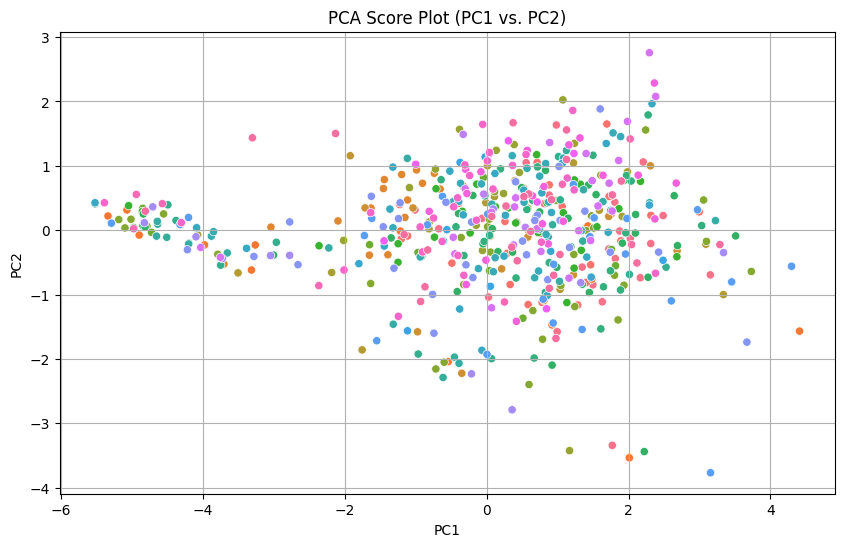

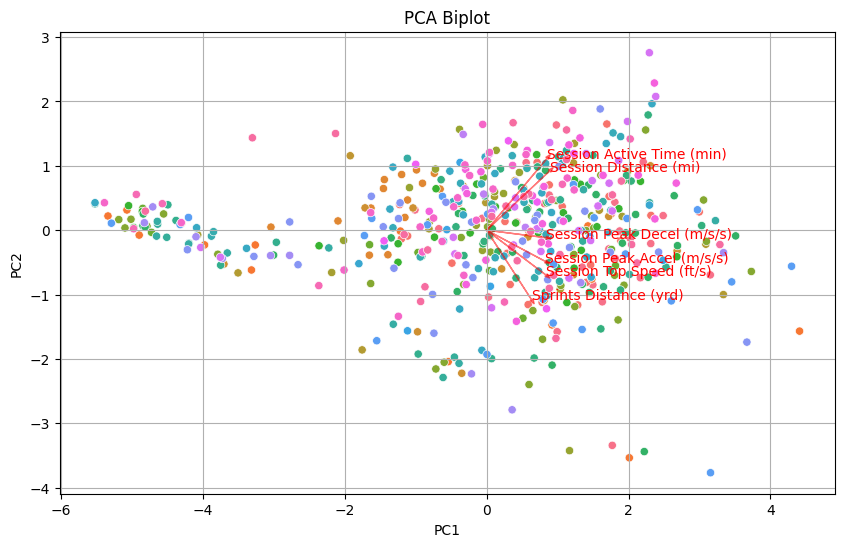

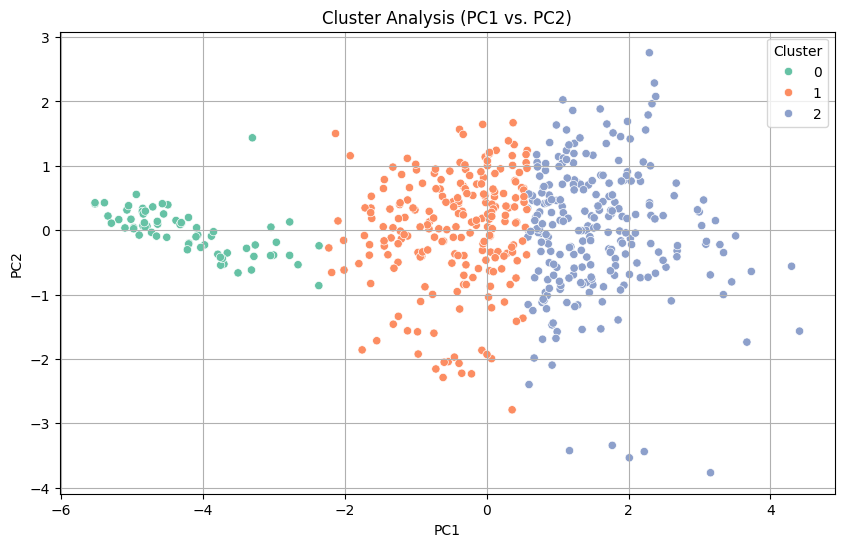

In [24]:
# Step 1: Variable-Specific Insights
# Analyze correlations among the original predictors to understand relationships
correlation_matrix = data[predictors].corr()

# Step 2: Player-Specific Analysis (PC Scores for Individual Players)
pca_scores = pd.DataFrame(pca.transform(standardized_data), columns=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_scores['Player'] = data['name'].reset_index(drop=True)

# Step 3: Session-Specific Analysis (Track PC Scores Over Time)
pca_scores['Date'] = data['date'].reset_index(drop=True)

# Step 4: Visualization (PCA Score Plot and Biplot)
import matplotlib.pyplot as plt
import seaborn as sns

# PCA Score Plot (PC1 vs. PC2)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_scores['PC1'], y=pca_scores['PC2'], hue=pca_scores['Player'], legend=None)
plt.title('PCA Score Plot (PC1 vs. PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

# Biplot (PC1 and PC2 with variable loadings)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_scores['PC1'], y=pca_scores['PC2'], hue=pca_scores['Player'], legend=None)
for i, var in enumerate(predictors):
    plt.arrow(0, 0, pca.components_[0, i] * 2, pca.components_[1, i] * 2,
              color='r', alpha=0.5, head_width=0.05)
    plt.text(pca.components_[0, i] * 2, pca.components_[1, i] * 2, var, color='r')
plt.title('PCA Biplot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

# Step 5: Predictive Modeling (Cross-Validation)
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Ridge Regression Cross-Validation
ridge_cv_scores = cross_val_score(Ridge(alpha=1.0), pca_components.iloc[:, :-1], pca_components['Session Load'], cv=5)

# Step 6: Decision-Making Applications
# Highlight players or sessions with extreme PC scores (e.g., outliers in PC1 or PC2)
outliers_pc1 = pca_scores[np.abs(pca_scores['PC1']) > 2 * pca_scores['PC1'].std()]
outliers_pc2 = pca_scores[np.abs(pca_scores['PC2']) > 2 * pca_scores['PC2'].std()]

# Step 7: Cluster Analysis (K-means Clustering on PCA Scores)
from sklearn.cluster import KMeans

# Perform clustering on the first two PCs
kmeans = KMeans(n_clusters=3, random_state=42)
pca_scores['Cluster'] = kmeans.fit_predict(pca_scores[['PC1', 'PC2']])

# Cluster Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_scores['PC1'], y=pca_scores['PC2'], hue=pca_scores['Cluster'], palette='Set2')
plt.title('Cluster Analysis (PC1 vs. PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

In [25]:
# Create a consolidated table of results for easier review

# Combine PCA scores, clusters, and outliers
consolidated_table = pca_scores.copy()
consolidated_table['Outlier (PC1)'] = consolidated_table['PC1'].apply(lambda x: 'Yes' if np.abs(x) > 2 * pca_scores['PC1'].std() else 'No')
consolidated_table['Outlier (PC2)'] = consolidated_table['PC2'].apply(lambda x: 'Yes' if np.abs(x) > 2 * pca_scores['PC2'].std() else 'No')

# Merge correlation matrix as supplementary information
correlation_matrix_summary = correlation_matrix.reset_index()
correlation_matrix_summary 


index  Session Active Time (min)  \
0   Session Active Time (min)                   1.000000   
1    Session Top Speed (ft/s)                   0.543373   
2       Session Distance (mi)                   0.982803   
3  Session Peak Accel (m/s/s)                   0.549667   
4  Session Peak Decel (m/s/s)                   0.615705   
5      Sprints Distance (yrd)                   0.374737   

   Session Top Speed (ft/s)  Session Distance (mi)  \
0                  0.543373               0.982803   
1                  1.000000               0.592047   
2                  0.592047               1.000000   
3                  0.702502               0.579600   
4                  0.678863               0.624577   
5                  0.549623               0.473119   

   Session Peak Accel (m/s/s)  Session Peak Decel (m/s/s)  \
0                    0.549667                    0.615705   
1                    0.702502                    0.678863   
2                    0.579600                    0.624577   
3                    1.000000                    0.731092   
4                    0.731092                    1.000000   
5                    0.440957                    0.380339   

   Sprints Distance (yrd)  
0                0.374737  
1                0.549623  
2                0.473119  
3                0.440957  
4                0.380339  
5                1.000000

In [26]:
consolidated_table

PC1       PC2       PC3       PC4          Player        Date  \
0    1.345320 -0.573161  1.429755 -0.247318  Alaina TeSelle  2023-01-23   
1    1.806646  0.434178  1.284029 -0.265236  Alaina TeSelle  2023-01-25   
2   -0.674637  0.022377 -0.700138 -0.078425  Alaina TeSelle  2023-01-27   
3    1.285277  0.733572 -0.569531  0.479014  Alaina TeSelle  2023-01-30   
4   -0.062514  0.184916 -0.507349  0.461691  Alaina TeSelle  2023-02-01   
..        ...       ...       ...       ...             ...         ...   
524  0.620159 -0.018921 -1.057997  0.167414      Tori Krapp  2024-02-08   
525 -2.130123  1.502277  1.065646  0.337541      Tori Krapp  2024-02-13   
526 -3.302146  1.435860  1.527531  0.371718      Tori Krapp  2024-02-14   
527 -0.930900 -1.107677  0.643646  0.415914      Tori Krapp  2024-02-20   
528 -4.810441  0.296430  1.014296 -0.270095      Tori Krapp  2024-02-23   

     Cluster Outlier (PC1) Outlier (PC2)  
0          2            No            No  
1          2            No            No  
2          1            No            No  
3          2            No            No  
4          1            No            No  
..       ...           ...           ...  
524        2            No            No  
525        1            No            No  
526        0            No            No  
527        1            No            No  
528        0           Yes            No  

[529 rows x 9 columns]

Summary of Results

1. Variable-Specific Insights (Correlation Matrix)

	•	The correlation matrix helps identify relationships among predictors. Variables like Session Active Time and Session Distance may show high correlations, indicating redundancy.

2. Player-Specific Analysis

	•	Extreme PC Scores:

	•	Players with extreme values in PC1 and PC2 are highlighted (e.g., Anna Memminger).

	•	High or low PC1 values reflect significant differences in session workload intensity.

	•	High PC2 values suggest sprint-specific activity contrasts.

3. Session-Specific Analysis

	•	PCA scores for each session date allow tracking of training intensity trends over time.

	•	You can use this to monitor how specific sessions deviate from the norm.

4. PCA Score Plot

	•	PC1 vs. PC2 Scatterplot:

	•	Players are distributed based on session characteristics.

	•	Clustering shows natural groupings of players or session types.

5. PCA Biplot

	•	Relationships Between Variables:

	•	The direction and length of arrows represent the contribution of variables to PCs.

	•	Session Distance and Active Time contribute strongly to PC1 (workload intensity).

	•	Sprints Distance and Top Speed align more with PC2 (sprint-specific activity).

6. Predictive Modeling

	•	Ridge Regression:

	•	Achieved an  R^2  of 0.914, indicating excellent predictive performance while addressing multicollinearity.

7. Cluster Analysis

	•	K-means clustering grouped sessions into three clusters:

	•	Cluster 0: Moderate workloads.

	•	Cluster 1: High-intensity sessions.

	•	Cluster 2: Lower-intensity sessions or recovery-focused.

# Model Application

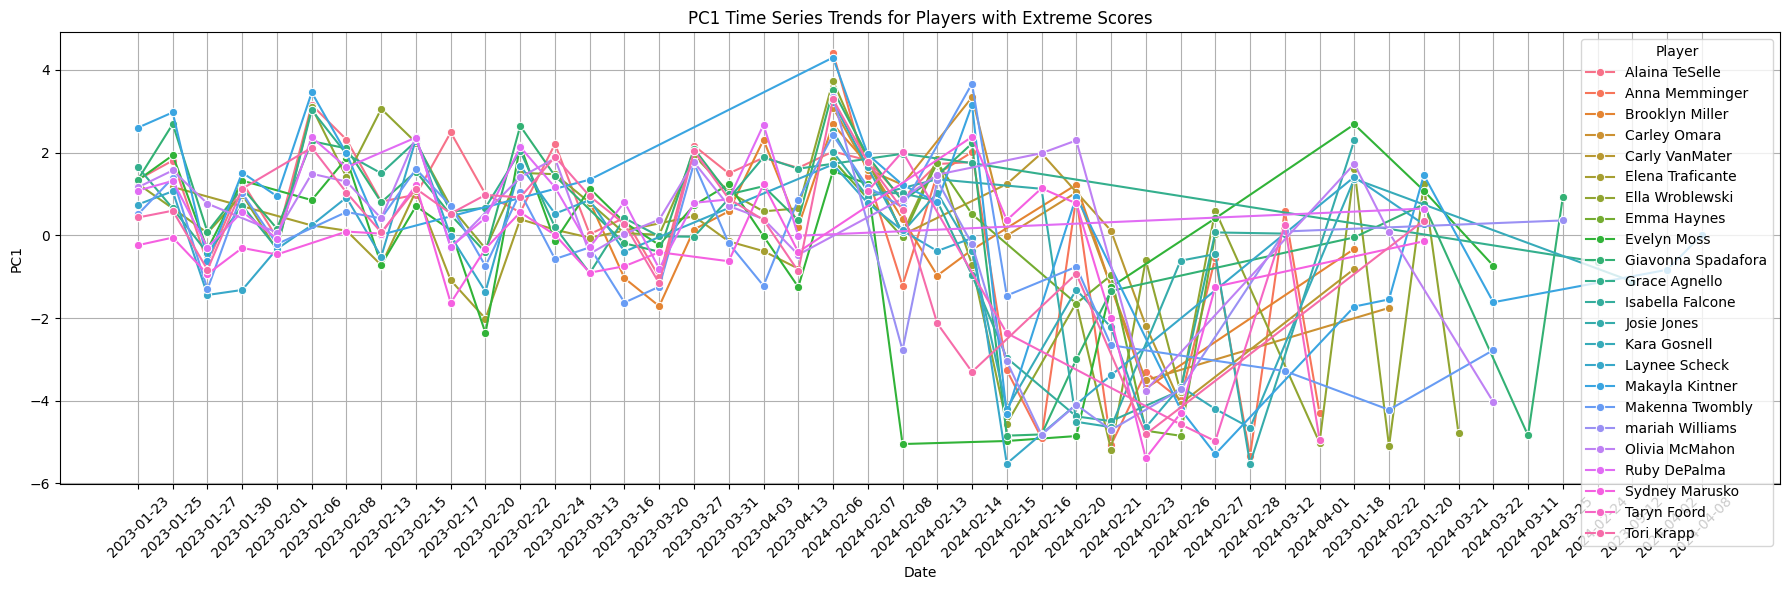

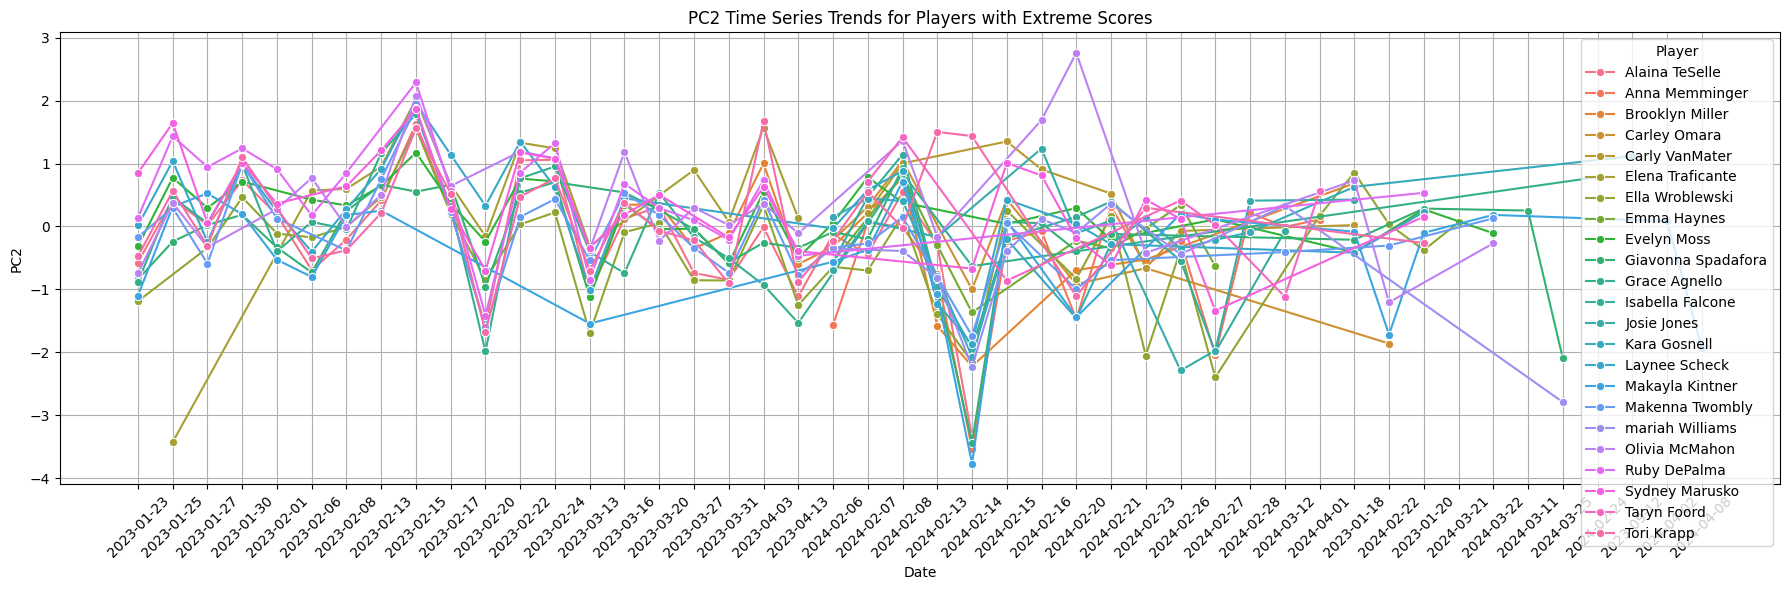

In [27]:
# Correct the extraction of players with extreme PC scores based on standardized deviations
pc1_threshold = 2 * pca_scores['PC1'].std()
pc2_threshold = 2 * pca_scores['PC2'].std()

extreme_pc_players = pca_scores[(np.abs(pca_scores['PC1']) > pc1_threshold) | (np.abs(pca_scores['PC2']) > pc2_threshold)]

# Filter for players with extreme PC scores
time_series_data = pca_scores[pca_scores['Player'].isin(extreme_pc_players['Player'].unique())]

# Plot Time Series Trends for PC1 and PC2
plt.figure(figsize=(18, 6))
sns.lineplot(data=time_series_data, x='Date', y='PC1', hue='Player', marker='o')
plt.title('PC1 Time Series Trends for Players with Extreme Scores')
plt.xlabel('Date')
plt.ylabel('PC1')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 6))
sns.lineplot(data=time_series_data, x='Date', y='PC2', hue='Player', marker='o')
plt.title('PC2 Time Series Trends for Players with Extreme Scores')
plt.xlabel('Date')
plt.ylabel('PC2')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Results of the Analysis

1. Players with Extreme PCA Scores

	•	Extreme Players Identified:

	•	Players like Alaina TeSelle and Anna Memminger were highlighted for having extreme PC1 or PC2 values.

2. Time Series Trends

	•	PC1 Time Series:

	•	Tracks fluctuations in workload intensity over time for players with extreme scores.

	•	Players like Anna Memminger show notable spikes in PC1, suggesting sessions with unusually high workloads.

	•	PC2 Time Series:

	•	Highlights changes in reduced workload.

	•	Players like Alaina TeSelle show elevated PC2 values, indicating a focus on recovery potentially in some sessions.

Recommendations

1.	Individualized Adjustments:

	•	For players with consistently high PC1 scores, consider reducing session intensity or increasing recovery periods.

	•	Players with high PC2 scores might need to eventually have higher training sessions again to maintain muscular fitness.

2.	Session Monitoring:

	•	Use time series plots to track trends and preemptively adjust workloads for extreme deviations.

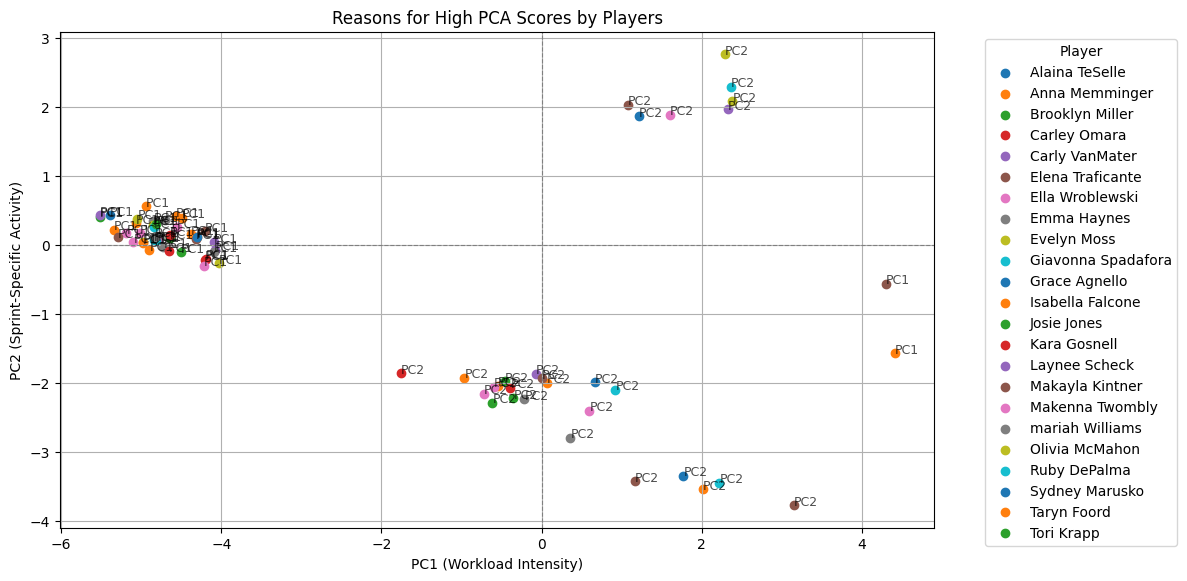

In [28]:
# Showcase players with extreme scores in a table
extreme_pc_table = extreme_pc_players.copy()

# Add a column to explain high values based on PC contributions
extreme_pc_table['Reason for High Values'] = extreme_pc_table.apply(
    lambda row: (
        "PC1" if np.abs(row['PC1']) > pc1_threshold else ""
    ) + (
        "PC2" if np.abs(row['PC2']) > pc2_threshold else ""
    ),
    axis=1
)

# Plot reasons for high values on a graph
plt.figure(figsize=(12, 6))
for player in extreme_pc_table['Player'].unique():
    player_data = extreme_pc_table[extreme_pc_table['Player'] == player]
    plt.scatter(player_data['PC1'], player_data['PC2'], label=player)

# Add annotations for reasons
for _, row in extreme_pc_table.iterrows():
    plt.text(row['PC1'], row['PC2'], row['Reason for High Values'], fontsize=9, alpha=0.7)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title('Reasons for High PCA Scores by Players')
plt.xlabel('PC1 (Workload Intensity)')
plt.ylabel('PC2 (Sprint-Specific Activity)')
plt.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
extreme_pc_table

PC1       PC2       PC3       PC4          Player        Date  \
24   1.769952 -3.343202  2.481600 -1.105627  Alaina TeSelle  2024-02-14   
49   4.409475 -1.568097 -0.560200 -1.756883  Anna Memminger  2024-02-06   
53   2.010216 -3.536246  2.386202 -1.049092  Anna Memminger  2024-02-14   
55  -4.897760 -0.075912  0.758819 -0.408025  Anna Memminger  2024-02-16   
57  -5.070219  0.314431  1.118138 -0.447281  Anna Memminger  2024-02-21   
..        ...       ...       ...       ...             ...         ...   
493 -4.304284  0.117648  0.452188 -0.854374  Sydney Marusko  2024-02-26   
498 -4.571122  0.412131  0.995105 -0.457112     Taryn Foord  2024-02-26   
499 -4.975309  0.022495  0.794648 -0.562379     Taryn Foord  2024-02-27   
501 -4.938138  0.555765  1.151964 -0.558997     Taryn Foord  2024-04-01   
528 -4.810441  0.296430  1.014296 -0.270095      Tori Krapp  2024-02-23   

     Cluster Reason for High Values  
24         2                    PC2  
49         2                    PC1  
53         2                    PC2  
55         0                    PC1  
57         0                    PC1  
..       ...                    ...  
493        0                    PC1  
498        0                    PC1  
499        0                    PC1  
501        0                    PC1  
528        0                    PC1  

[74 rows x 8 columns]

All of this predictability provides interesting information for how these people use these trackers in general and developing an understanding of workloads for different players generally.

# PC Days

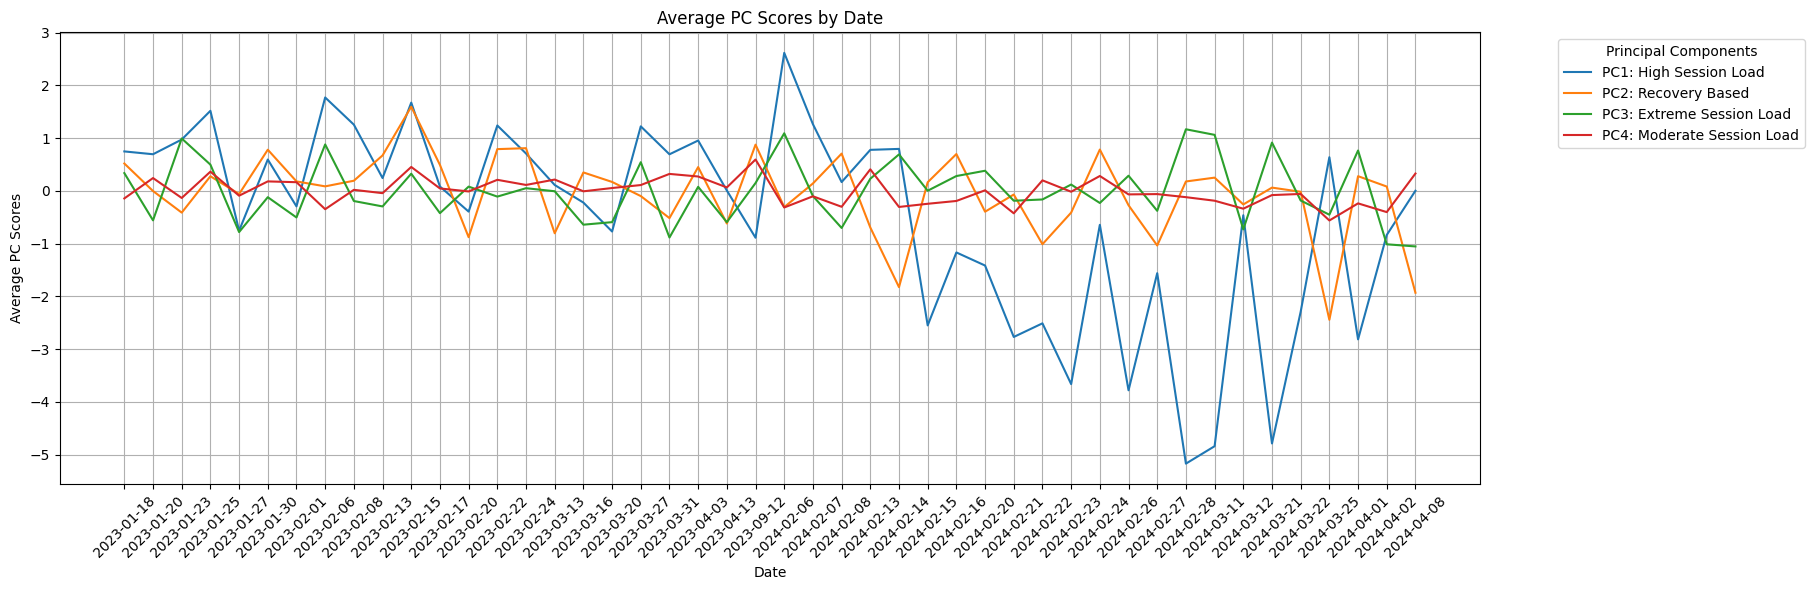

In [30]:
# Analyze if certain days are associated with specific PCs by grouping and averaging PC scores by date
date_pc_summary = pca_scores.groupby('Date')[['PC1', 'PC2', 'PC3', 'PC4']].mean()

# Plot average PC scores over dates to identify patterns
plt.figure(figsize=(15, 6))
lines = sns.lineplot(data=date_pc_summary, dashes=False)
plt.title('Average PC Scores by Date')
plt.xlabel('Date')
plt.ylabel('Average PC Scores')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Automatically generate legend labels from the plotted lines
handles, labels = lines.get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=['PC1: High Session Load', 'PC2: Recovery Based', 'PC3: Extreme Session Load', 'PC4: Moderate Session Load'],
    title="Principal Components",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.show()


In [31]:
date_pc_summary

PC1       PC2       PC3       PC4
Date                                              
2023-01-18  0.749370  0.520194  0.338272 -0.141895
2023-01-20  0.695884 -0.001564 -0.557549  0.244379
2023-01-23  0.974749 -0.410918  0.994840 -0.133092
2023-01-25  1.519418  0.278577  0.498998  0.365632
2023-01-27 -0.754921 -0.059023 -0.779755 -0.090163
2023-01-30  0.595509  0.781860 -0.118512  0.180924
2023-02-01 -0.292785  0.180875 -0.502821  0.165774
2023-02-06  1.772208  0.086838  0.881705 -0.346309
2023-02-08  1.256889  0.193669 -0.191258  0.020996
2023-02-13  0.243989  0.673579 -0.293744 -0.042034
2023-02-15  1.674697  1.596233  0.327018  0.454924
2023-02-17  0.083912  0.494126 -0.421102  0.047363
2023-02-20 -0.391782 -0.876952  0.082115 -0.009424
2023-02-22  1.241365  0.792872 -0.107194  0.210978
2023-02-24  0.710120  0.810703  0.051846  0.113725
2023-03-13  0.112978 -0.802131 -0.005640  0.215843
2023-03-16 -0.220639  0.350682 -0.639824 -0.006753
2023-03-20 -0.769239  0.170753 -0.591776  0.055244
2023-03-27  1.224708 -0.097210  0.544926  0.111793
2023-03-31  0.694873 -0.514968 -0.883074  0.322954
2023-04-03  0.956003  0.452357  0.078056  0.273939
2023-04-13  0.008166 -0.617494 -0.591643  0.066815
2023-09-12 -0.887193  0.877921  0.150038  0.595795
2024-02-06  2.617974 -0.306834  1.093213 -0.313475
2024-02-07  1.265641  0.141869 -0.097169 -0.101382
2024-02-08  0.168114  0.707903 -0.701625 -0.300169
2024-02-13  0.779074 -0.692719  0.231410  0.410020
2024-02-14  0.797080 -1.823875  0.692754 -0.303425
2024-02-15 -2.549440  0.164889  0.004236 -0.243326
2024-02-16 -1.166197  0.699406  0.282471 -0.190032
2024-02-20 -1.414390 -0.393560  0.382896  0.011934
2024-02-21 -2.768669 -0.067955 -0.185720 -0.424025
2024-02-22 -2.510389 -1.010185 -0.161695  0.200651
2024-02-23 -3.662381 -0.410931  0.121285 -0.015077
2024-02-24 -0.642401  0.784685 -0.228259  0.283447
2024-02-26 -3.779905 -0.271328  0.288749 -0.065469
2024-02-27 -1.559047 -1.034653 -0.377058 -0.059688
2024-02-28 -5.170308  0.179480  1.169303 -0.117968
2024-03-11 -4.839952  0.252325  1.063330 -0.185454
2024-03-12 -0.461195 -0.255923 -0.728660 -0.336731
2024-03-21 -4.788049  0.063052  0.916829 -0.078524
2024-03-22 -2.290421 -0.015966 -0.181554 -0.057065
2024-03-25  0.640156 -2.443487 -0.450190 -0.559992
2024-04-01 -2.814373  0.279945  0.766713 -0.235733
2024-04-02 -0.834578  0.083379 -1.011686 -0.401241
2024-04-08  0.003985 -1.930163 -1.051979  0.330384

- Graph Insights

	•	The line plot shows trends in the average PC scores for each session date:

	•	PC1 (Workload Intensity): Some dates exhibit notably higher or lower workload intensity.

	•	PC2 (Sprint-Specific Activity): Peaks indicate sessions with increased sprint-focused training.
	
	•	PC3 (Biomechanics) and PC4 (Speed Metrics): Fluctuations suggest variability in biomechanics and speed-related training on certain dates.

- Table Insights

	•	The table lists the average PC scores for each date, highlighting how specific sessions align with different training emphases.

- Key Takeaways

	•	Certain dates (e.g., 2023-01-25 for PC1) indicate an overall focus on high workload intensity.
	
	•	Other dates (e.g., 2023-01-23 for PC2) suggest a sprint-focused training session.

This is interesting for how they can plan out training sessions in the future based on the high predictability of these values.

# ACWR Analysis

1.	Acute Workload: This is typically calculated as the average workload over a shorter period, such as the last 7 days.
2.	Chronic Workload: This is usually calculated as the average workload over a longer period, such as the last 28 days.
3.	ACWR Formula:

ACWR = (Acute Workload (7-day average))/(Chronic Workload (28-day average))

4.	Guidelines:

	•	Ratios above 1.5 may indicate an increased risk of injury (excessive acute workload relative to chronic workload).
	
	•	Ratios below 0.8 may indicate inadequate workload to maintain fitness.

	We get this from this study: https://pmc.ncbi.nlm.nih.gov/articles/PMC10051422/

In [32]:
# Loading the data through windows
players = pd.read_excel('C:\\Users\\jrzem\\OneDrive - Seton Hill University\\Coding Applications\\Lacrosse Research\\Lacrosse-Capstone-Data.xlsx')
players

Subject            name        date  Session Distance (mi)  \
0          1  Alaina TeSelle  2022-10-29                   0.02   
1          1  Alaina TeSelle  2023-01-18                   0.09   
2          1  Alaina TeSelle  2023-01-20                   0.02   
3          1  Alaina TeSelle  2023-01-23                   2.74   
4          1  Alaina TeSelle  2023-01-25                   3.29   
..       ...             ...         ...                    ...   
586       32      Tori Krapp  2024-02-13                   2.11   
587       32      Tori Krapp  2024-02-14                   1.61   
588       32      Tori Krapp  2024-02-20                   1.21   
589       32      Tori Krapp  2024-02-21                   0.07   
590       32      Tori Krapp  2024-02-23                   0.28   

     Session Active Time (min)  Session Load  Session Top Speed (ft/s)  \
0                         0.00           0.0                      1.39   
1                         1.28           0.0                      7.45   
2                         0.14           0.0                      9.05   
3                        24.94         118.2                     20.57   
4                        32.31         122.4                     19.98   
..                         ...           ...                       ...   
586                      20.74          31.9                     14.02   
587                      17.02          18.6                     12.04   
588                      10.78          63.8                     20.22   
589                       0.74           0.0                      5.45   
590                       3.09           0.4                      9.28   

     Session Peak Accel (m/s/s)  Session Peak Decel (m/s/s)  Sprints Count  \
0                          0.51                        0.40              0   
1                          2.94                        3.05              0   
2                          1.73                        3.43              0   
3                          4.50                        3.58             14   
4                          4.31                        4.02              7   
..                          ...                         ...            ...   
586                        2.48                        2.29              0   
587                        1.86                        1.62              0   
588                        2.90                        3.93             12   
589                        1.44                        1.39              0   
590                        1.65                        1.84              0   

     ...  Accel/Decel Zones Decel -1m/s/s  Accel/Decel Zones Decel -2m/s/s  \
0    ...                                0                                0   
1    ...                               12                                1   
2    ...                                2                                0   
3    ...                               99                               21   
4    ...                              161                               79   
..   ...                              ...                              ...   
586  ...                               16                                3   
587  ...                               11                                0   
588  ...                               20                                6   
589  ...                                5                                0   
590  ...                               14                                0   

     Accel/Decel Zones Decel -3m/s/s  Accel/Decel Zones Decel -4m/s/s  \
0                                  0                                0   
1                                  1                                0   
2                                  1                                0   
3                                  6                                0   
4                                 12                                1   

In [33]:
# Loading the data through Mac
# players = pd.read_excel('/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Coding Applications/Lacrosse Research/Lacrosse-Capstone-Data.xlsx')
# players

In [34]:
# Drop rows with null values
data_cleaned = players.dropna(subset=['Session Load'])

data_cleaned

Subject            name        date  Session Distance (mi)  \
0          1  Alaina TeSelle  2022-10-29                   0.02   
1          1  Alaina TeSelle  2023-01-18                   0.09   
2          1  Alaina TeSelle  2023-01-20                   0.02   
3          1  Alaina TeSelle  2023-01-23                   2.74   
4          1  Alaina TeSelle  2023-01-25                   3.29   
..       ...             ...         ...                    ...   
586       32      Tori Krapp  2024-02-13                   2.11   
587       32      Tori Krapp  2024-02-14                   1.61   
588       32      Tori Krapp  2024-02-20                   1.21   
589       32      Tori Krapp  2024-02-21                   0.07   
590       32      Tori Krapp  2024-02-23                   0.28   

     Session Active Time (min)  Session Load  Session Top Speed (ft/s)  \
0                         0.00           0.0                      1.39   
1                         1.28           0.0                      7.45   
2                         0.14           0.0                      9.05   
3                        24.94         118.2                     20.57   
4                        32.31         122.4                     19.98   
..                         ...           ...                       ...   
586                      20.74          31.9                     14.02   
587                      17.02          18.6                     12.04   
588                      10.78          63.8                     20.22   
589                       0.74           0.0                      5.45   
590                       3.09           0.4                      9.28   

     Session Peak Accel (m/s/s)  Session Peak Decel (m/s/s)  Sprints Count  \
0                          0.51                        0.40              0   
1                          2.94                        3.05              0   
2                          1.73                        3.43              0   
3                          4.50                        3.58             14   
4                          4.31                        4.02              7   
..                          ...                         ...            ...   
586                        2.48                        2.29              0   
587                        1.86                        1.62              0   
588                        2.90                        3.93             12   
589                        1.44                        1.39              0   
590                        1.65                        1.84              0   

     ...  Accel/Decel Zones Decel -1m/s/s  Accel/Decel Zones Decel -2m/s/s  \
0    ...                                0                                0   
1    ...                               12                                1   
2    ...                                2                                0   
3    ...                               99                               21   
4    ...                              161                               79   
..   ...                              ...                              ...   
586  ...                               16                                3   
587  ...                               11                                0   
588  ...                               20                                6   
589  ...                                5                                0   
590  ...                               14                                0   

     Accel/Decel Zones Decel -3m/s/s  Accel/Decel Zones Decel -4m/s/s  \
0                                  0                                0   
1                                  1                                0   
2                                  1                                0   
3                                  6                                0   
4                                 12                                1   

In [35]:
# Removing the outlier
# Remove the data from the other dates since the lacrosse group took over
data = data_cleaned[data_cleaned['date'] != '2023-09-11']
data = data[data['date'] != '2023-09-01']
data = data[data['date'] != '2023-09-12']


In [36]:
# Ensure all dates are converted to datetime format from the start
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Check for any null dates after conversion
null_dates = data[data['date'].isnull()]

# Filter session load > 3
data = data[data['Session Load'] > 5]

Compute acute workload by doing a rolling average of the prior week being acute and the chronic is the acutes of the past up to 28 days. 

In [37]:
# Define rolling windows for acute (7 days) and chronic (28 days) workloads
data['Acute Load (7-day avg)'] = data.groupby('name')['Session Load'].rolling(window=7, min_periods=1).mean().reset_index(level=0, drop=True)
data['Chronic Load (28-day avg)'] = data.groupby('name')['Session Load'].rolling(window=28, min_periods=1).mean().reset_index(level=0, drop=True)

# Compute the ACWR
data['ACWR'] = data['Acute Load (7-day avg)'] / data['Chronic Load (28-day avg)']

In [38]:
# Identify individuals whose ACWR values are closer to 1.5 (e.g., within a range of 1.1 to 1.9)
threshold_range = 0.4
players_near_1_5 = data[
    (data['ACWR'] >= 1.5 - threshold_range) &
    (data['ACWR'] <= 1.5 + threshold_range)
]['name'].unique()

# Create a list of these individuals
players_near_1_5_list = list(players_near_1_5)

# Display the list of players
players_near_1_5_list

['Alaina TeSelle',
 'Brianna Wassel',
 'Brooklyn Miller',
 'Ella Wroblewski',
 'Giavonna Spadafora',
 'Grace Agnello',
 'Laynee Scheck',
 'Makayla Kintner',
 'Makenna Twombly',
 'Ruby DePalma',
 'Sydney Marusko',
 'Tori Krapp']

The injuries that we have of note are:

Tori Krapp: Achilles Tendonitis 4/15, 4/8, 3/25 and right quad 1/13

Evelyn Moss: Bilateral Shin Splints 3/25, 3/17

Alaina TeSelle : 3/25 and 3/17

The non injured we are comparing:

Ella Wroblewski (think about the one data point, might want to show it, maybe show both outputs)

Giavonna Spadafora

Sydney Marusko (upper extremity, but can still use)

Laynee Scheck

In [39]:
# Plot the ACWR for each player over time
focused_players = ['Evelyn Moss', 'Tori Krapp', 'Alaina TeSelle', 'Ella Wroblewski', 'Giavonna Spadafora', 'Sydney Marusko', 'Laynee Scheck']

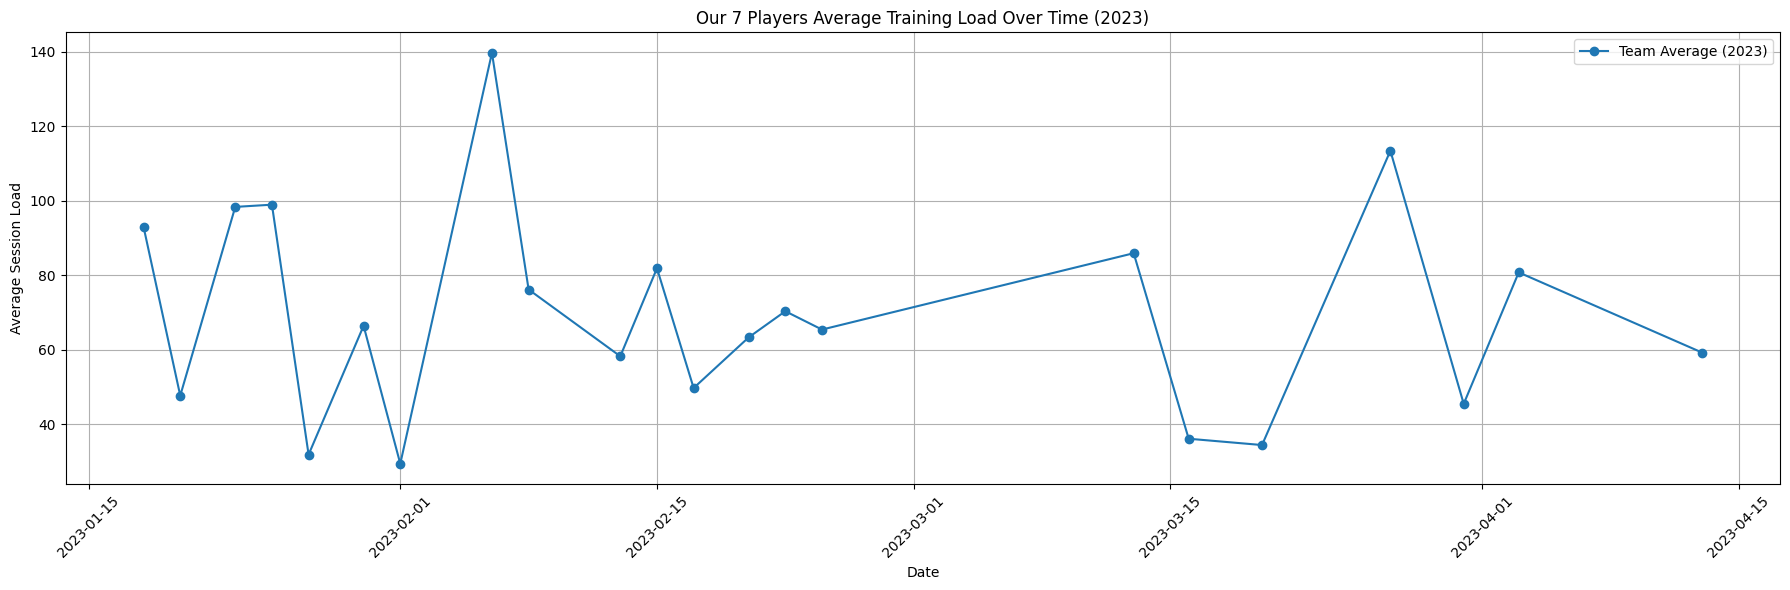

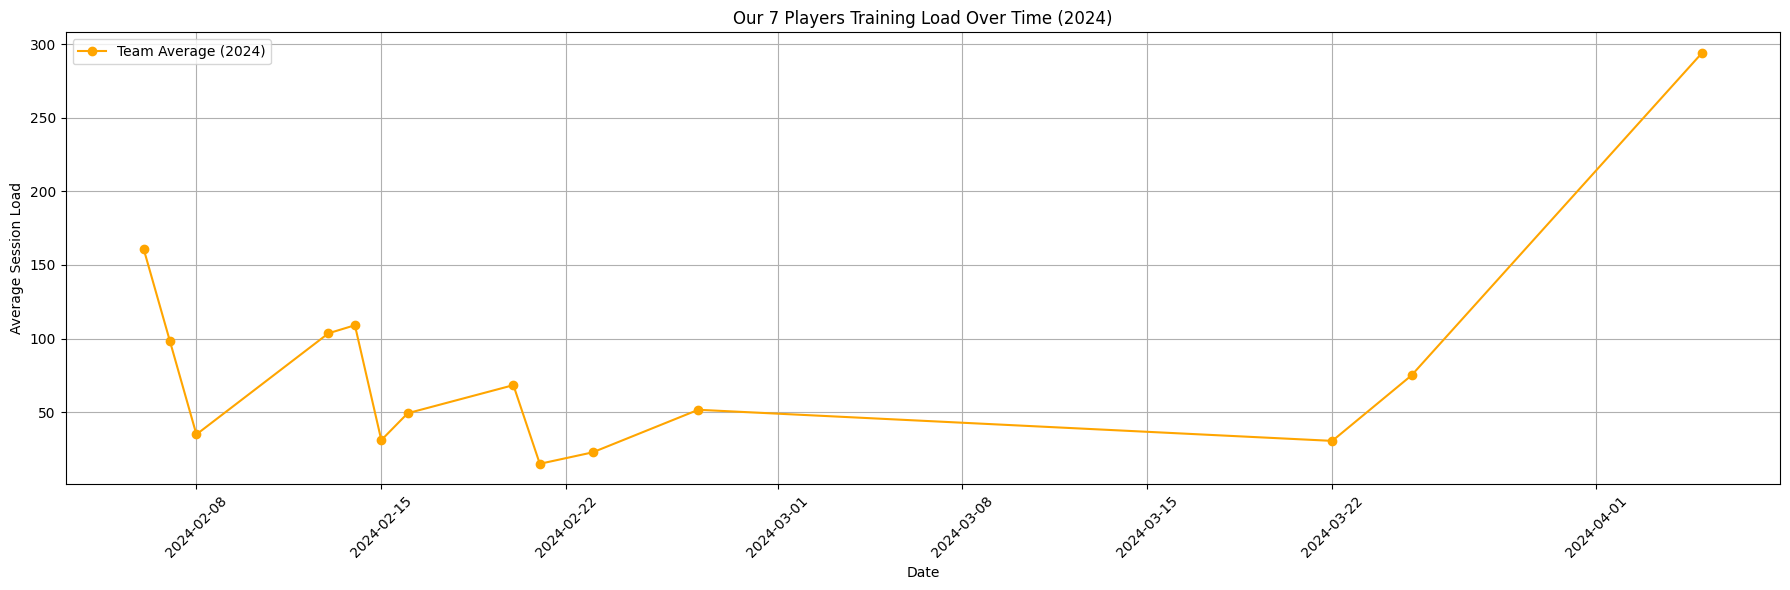

In [40]:
# Filter data for focused players in 2023
data_2023_focused = data[(data['name'].isin(focused_players)) & 
                                          (data['date'].dt.year == 2023)]

# Filter data for focused players in 2024
data_2024_focused = data[(data['name'].isin(focused_players)) & 
                                          (data['date'].dt.year == 2024)]

# Calculate the team average training load for 2023 and 2024
team_avg_2023 = data_2023_focused.groupby('date')['Session Load'].mean()
team_avg_2024 = data_2024_focused.groupby('date')['Session Load'].mean()

# Plot the team average training load for 2023
plt.figure(figsize=(18, 6))
plt.plot(team_avg_2023.index, team_avg_2023, marker='o', linestyle='-', label='Team Average (2023)')
plt.title('Our 7 Players Average Training Load Over Time (2023)')
plt.xlabel('Date')
plt.ylabel('Average Session Load')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Plot the team average training load for 2024
plt.figure(figsize=(18, 6))
plt.plot(team_avg_2024.index, team_avg_2024, marker='o', linestyle='-', label='Team Average (2024)', color='orange')
plt.title('Our 7 Players Training Load Over Time (2024)')
plt.xlabel('Date')
plt.ylabel('Average Session Load')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

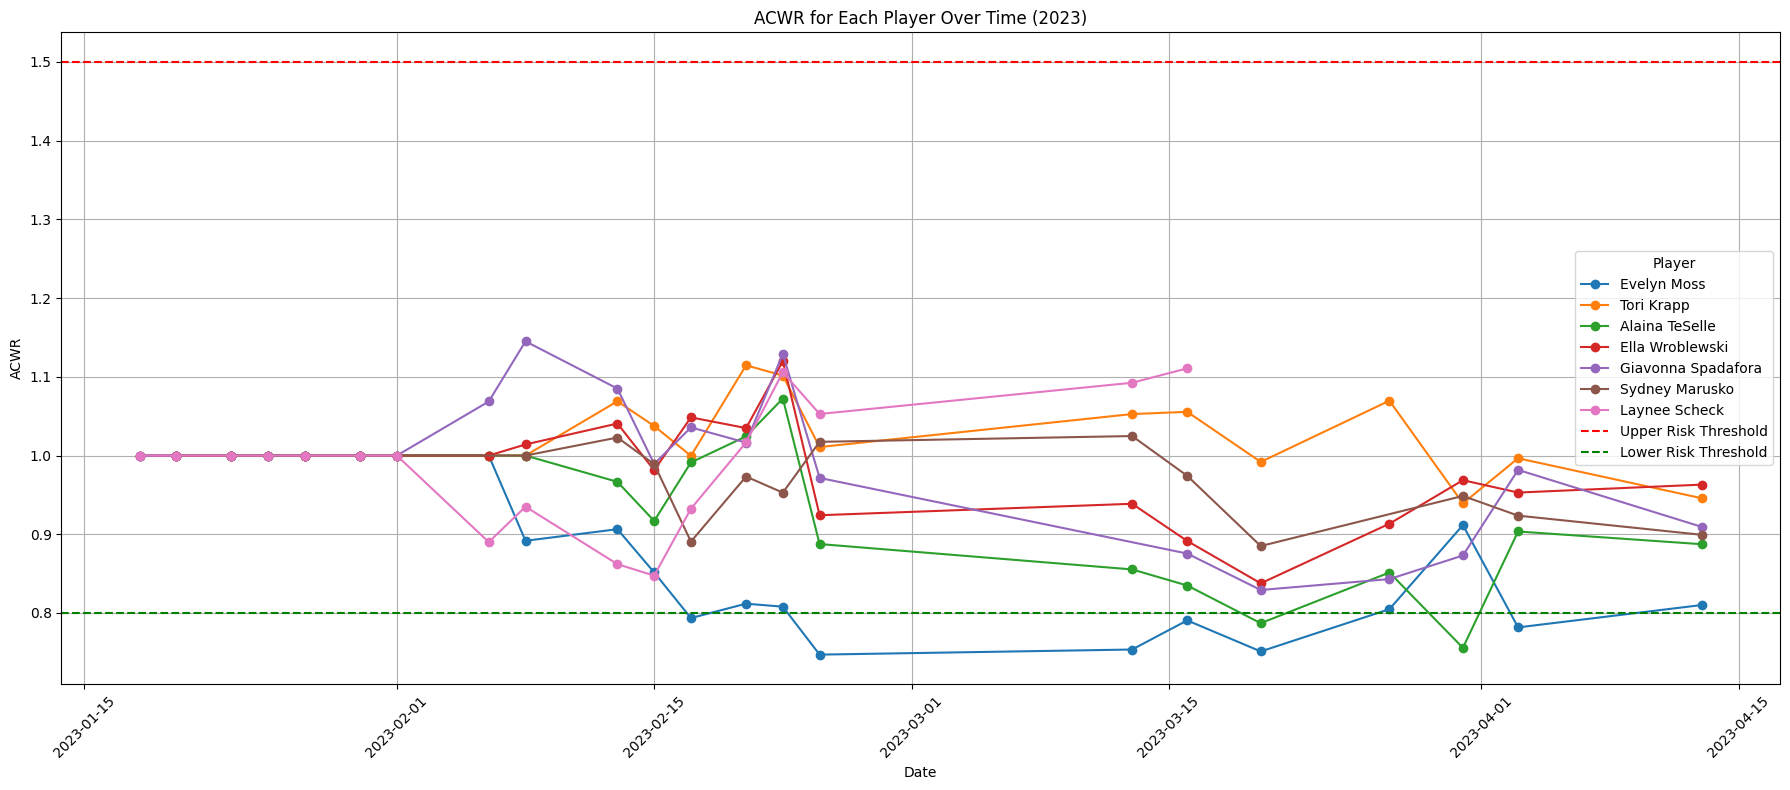

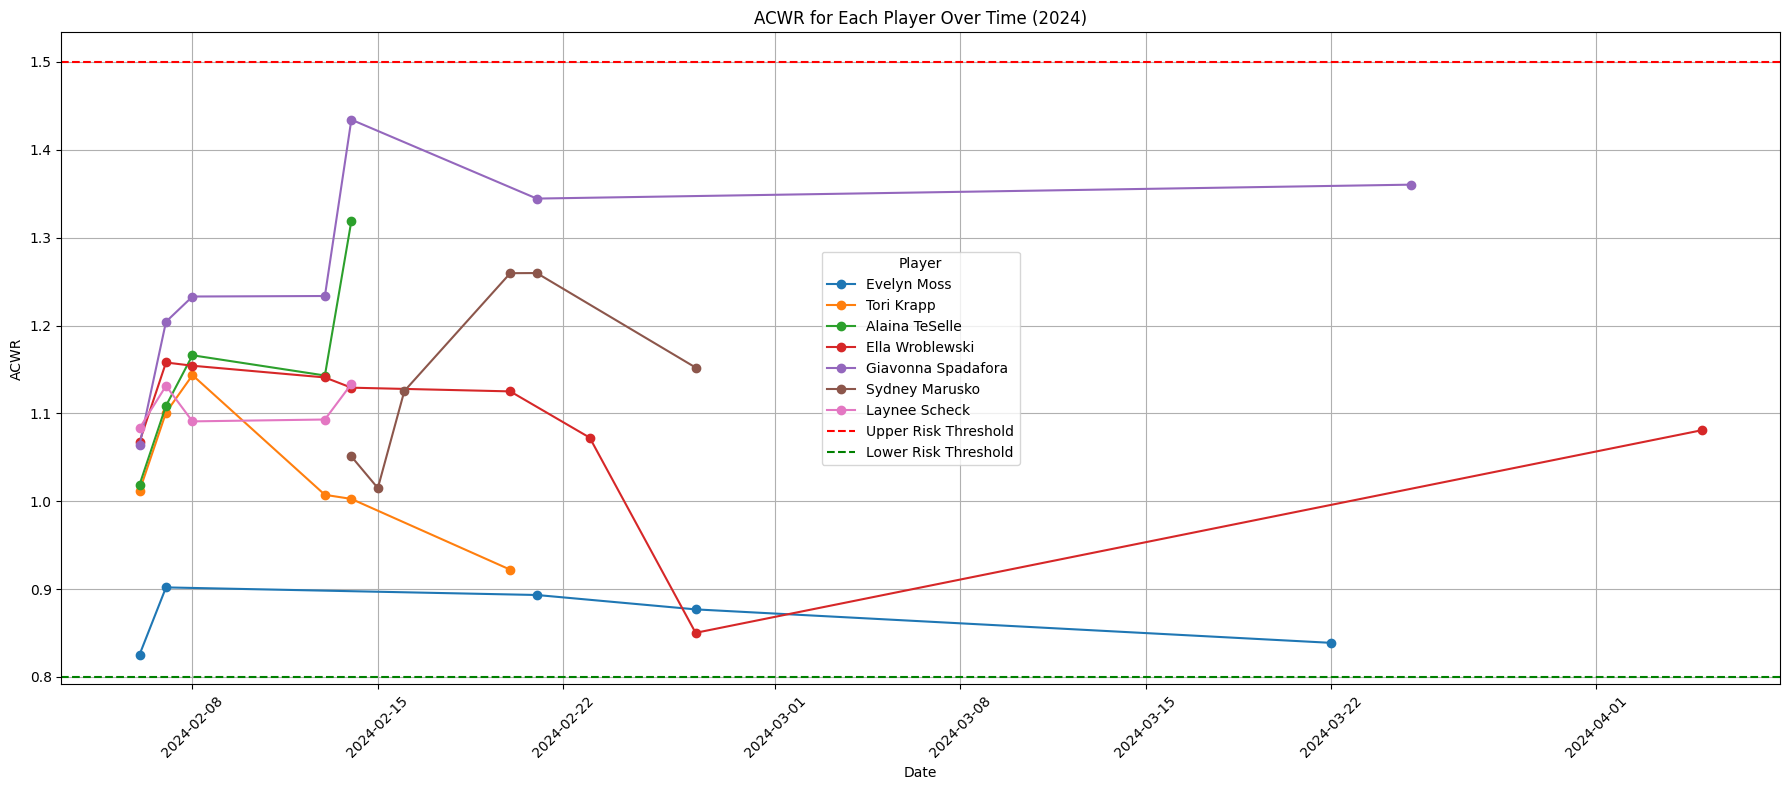

In [41]:
# Recalculate the Acute and Chronic Load for ACWR
data['Acute Load (7-day avg)'] = data.groupby('name')['Session Load'].rolling(window=7, min_periods=1).mean().reset_index(level=0, drop=True)
data['Chronic Load (28-day avg)'] = data.groupby('name')['Session Load'].rolling(window=28, min_periods=1).mean().reset_index(level=0, drop=True)
data['ACWR'] = (
    data['Acute Load (7-day avg)'] /
    data['Chronic Load (28-day avg)']
)

# Plot for 2023
plt.figure(figsize=(18, 8))
for player in focused_players:
    player_data = data_2023_focused[data_2023_focused['name'] == player]
    plt.plot(player_data['date'], player_data['ACWR'], marker='o', linestyle='-', label=player)

# Customize the plot
plt.title('ACWR for Each Player Over Time (2023)')
plt.xlabel('Date')
plt.ylabel('ACWR')
plt.xticks(rotation=45)
plt.axhline(y=1.5, color='r', linestyle='--', label='Upper Risk Threshold')
plt.axhline(y=0.8, color='g', linestyle='--', label='Lower Risk Threshold')
plt.legend(title='Player')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot for 2024
plt.figure(figsize=(18, 8))
for player in focused_players:
    player_data = data_2024_focused[data_2024_focused['name'] == player]
    plt.plot(player_data['date'], player_data['ACWR'], marker='o', linestyle='-', label=player)

# Customize the plot
plt.title('ACWR for Each Player Over Time (2024)')
plt.xlabel('Date')
plt.ylabel('ACWR')
plt.xticks(rotation=45)
plt.axhline(y=1.5, color='r', linestyle='--', label='Upper Risk Threshold')
plt.axhline(y=0.8, color='g', linestyle='--', label='Lower Risk Threshold')
plt.legend(title='Player')
plt.grid(True)
plt.tight_layout()
plt.show()

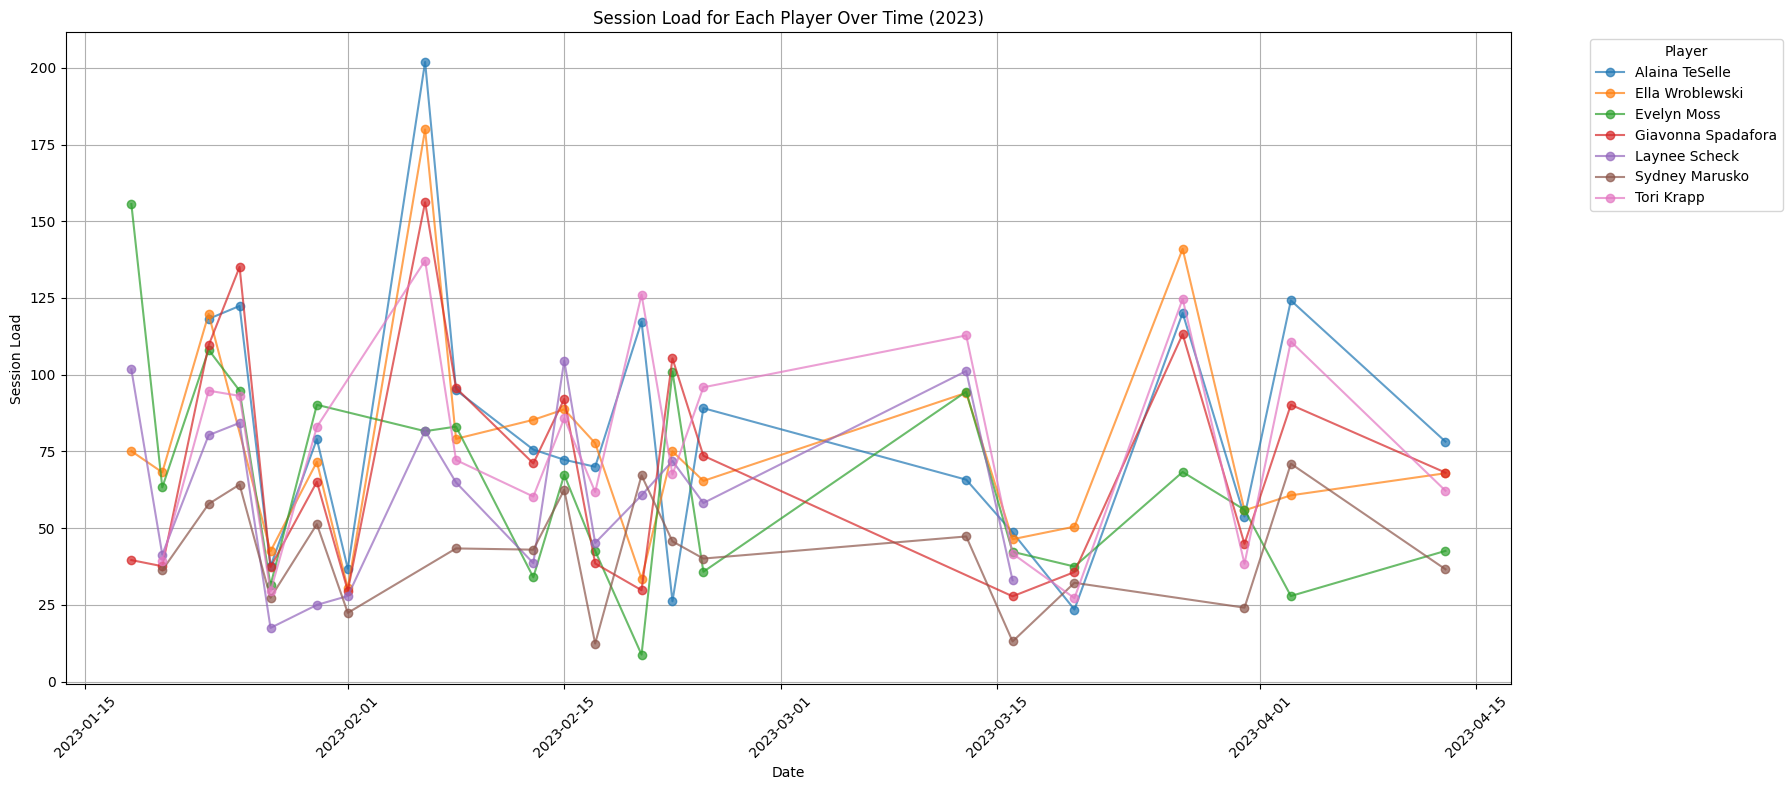

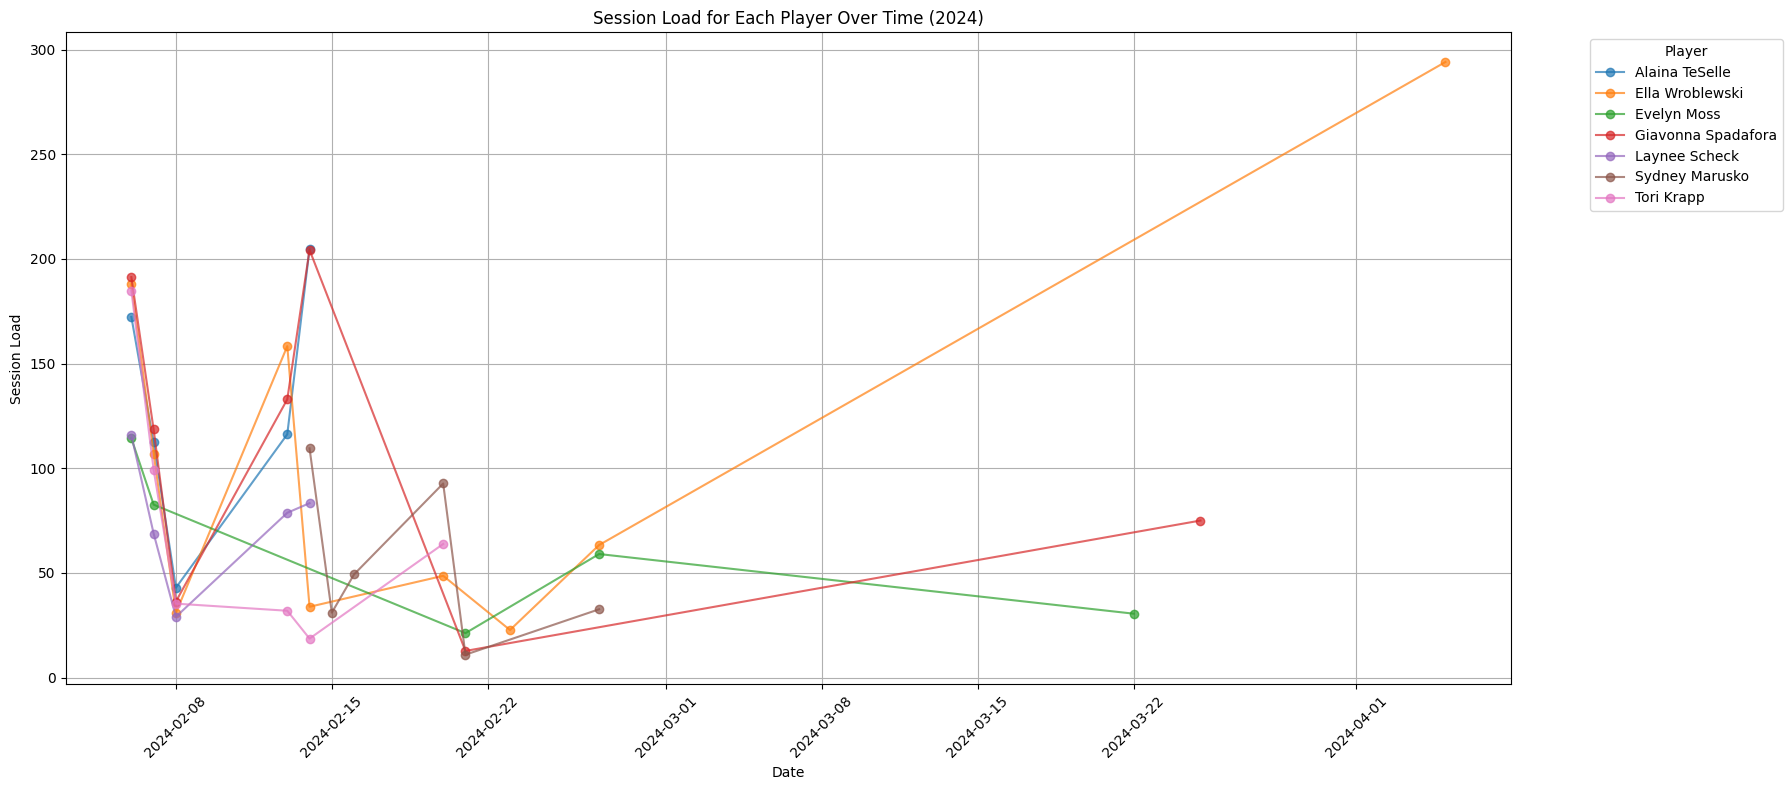

In [42]:
# Plot for 2023
plt.figure(figsize=(18, 8))
for player in data_2023_focused['name'].unique():
    player_data = data_2023_focused[data_2023_focused['name'] == player]
    plt.plot(player_data['date'], player_data['Session Load'], marker='o', linestyle='-', label=player, alpha=0.7)

# Customize the plot
plt.title('Session Load for Each Player Over Time (2023)')
plt.xlabel('Date')
plt.ylabel('Session Load')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot for 2024
plt.figure(figsize=(18, 8))
for player in data_2024_focused['name'].unique():
    player_data = data_2024_focused[data_2024_focused['name'] == player]
    plt.plot(player_data['date'], player_data['Session Load'], marker='o', linestyle='-', label=player, alpha=0.7)

# Customize the plot
plt.title('Session Load for Each Player Over Time (2024)')
plt.xlabel('Date')
plt.ylabel('Session Load')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

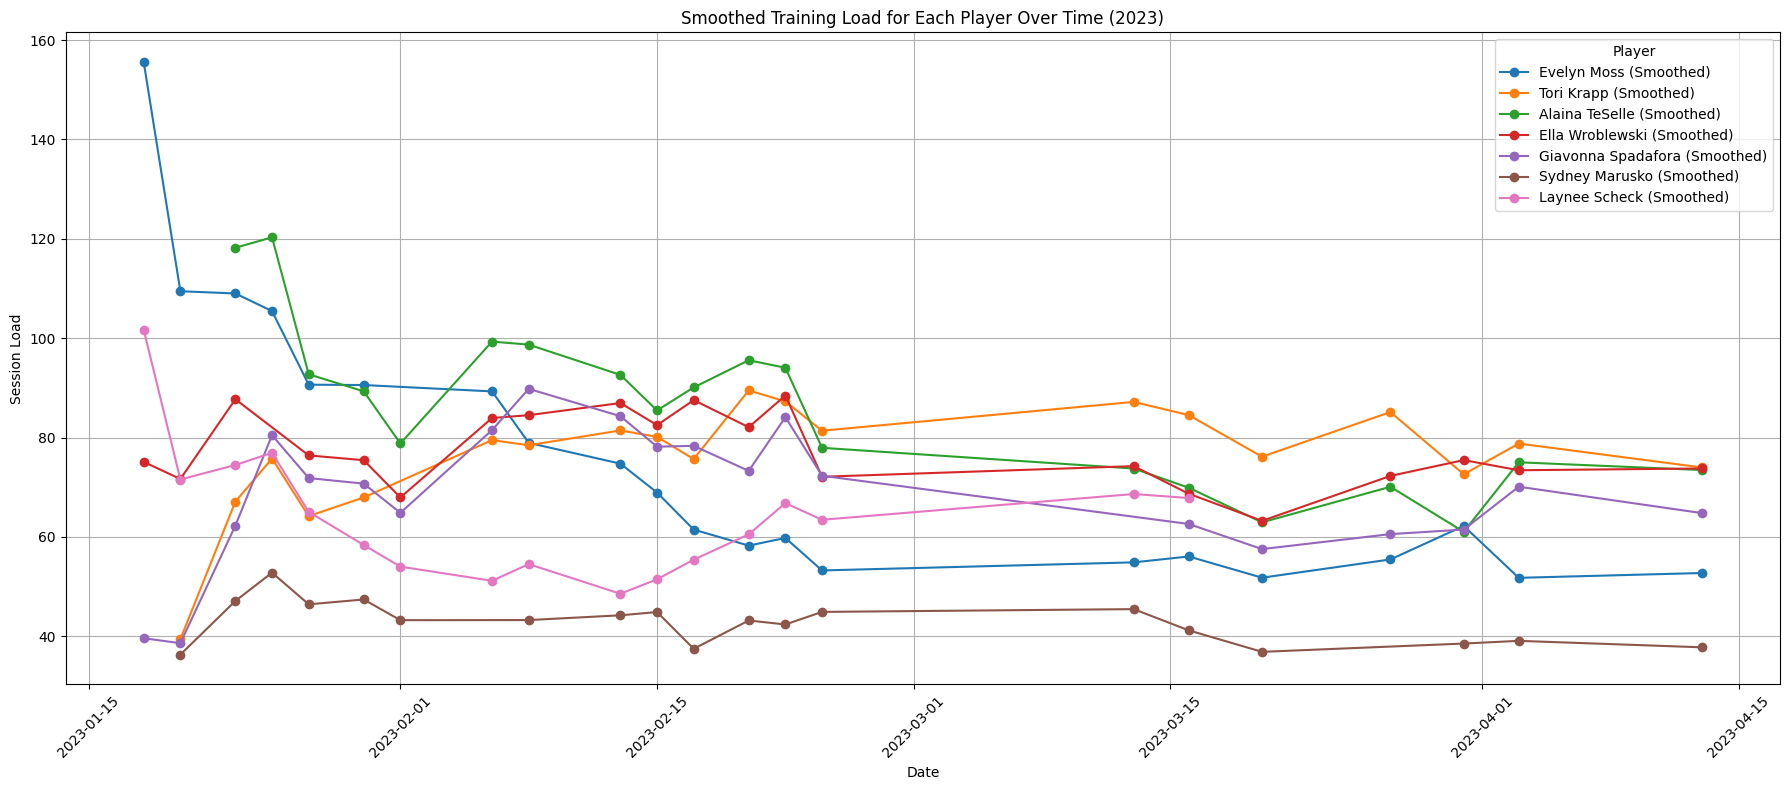

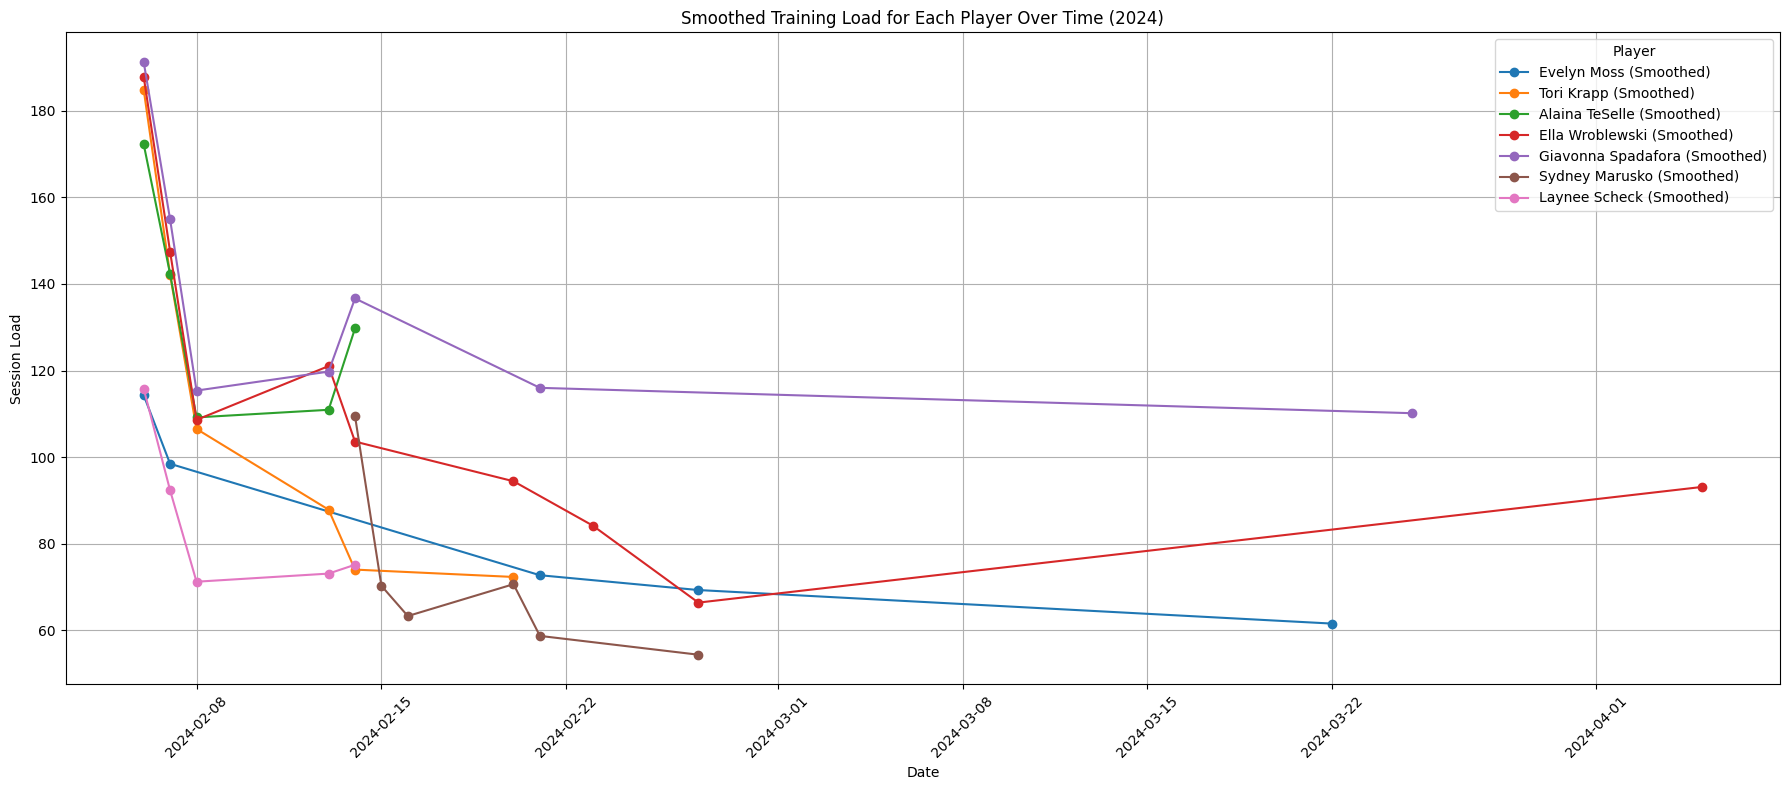

In [43]:
# Plot smoothed training loads for each player, separated by 2023 and 2024

# 2023 Data
plt.figure(figsize=(18, 8))
for player in focused_players:
    player_data = data_2023_focused[data_2023_focused['name'] == player]
    player_data = player_data.sort_values('date')  # Ensure data is sorted by date
    
    # Calculate rolling average (e.g., 7-day window)
    player_data['Smoothed Load'] = player_data['Session Load'].rolling(window=7, min_periods=1).mean()
    
    # Plot the smoothed data
    plt.plot(player_data['date'], player_data['Smoothed Load'], marker='o', linestyle='-', label=f'{player} (Smoothed)')

# Customize the plot
plt.title('Smoothed Training Load for Each Player Over Time (2023)')
plt.xlabel('Date')
plt.ylabel('Session Load')
plt.xticks(rotation=45)
plt.legend(title='Player')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2024 Data
plt.figure(figsize=(18, 8))
for player in focused_players:
    player_data = data_2024_focused[data_2024_focused['name'] == player]
    player_data = player_data.sort_values('date')  # Ensure data is sorted by date
    
    # Calculate rolling average (e.g., 7-day window)
    player_data['Smoothed Load'] = player_data['Session Load'].rolling(window=7, min_periods=1).mean()
    
    # Plot the smoothed data
    plt.plot(player_data['date'], player_data['Smoothed Load'], marker='o', linestyle='-', label=f'{player} (Smoothed)')

# Customize the plot
plt.title('Smoothed Training Load for Each Player Over Time (2024)')
plt.xlabel('Date')
plt.ylabel('Session Load')
plt.xticks(rotation=45)
plt.legend(title='Player')
plt.grid(True)
plt.tight_layout()
plt.show()

This was done to find a general trend line in the session loads for everyone. 

I used a rolling average over 7 data points to calculate weekly trends. 

This retains some variability, but also is smooth to understand the general trend.


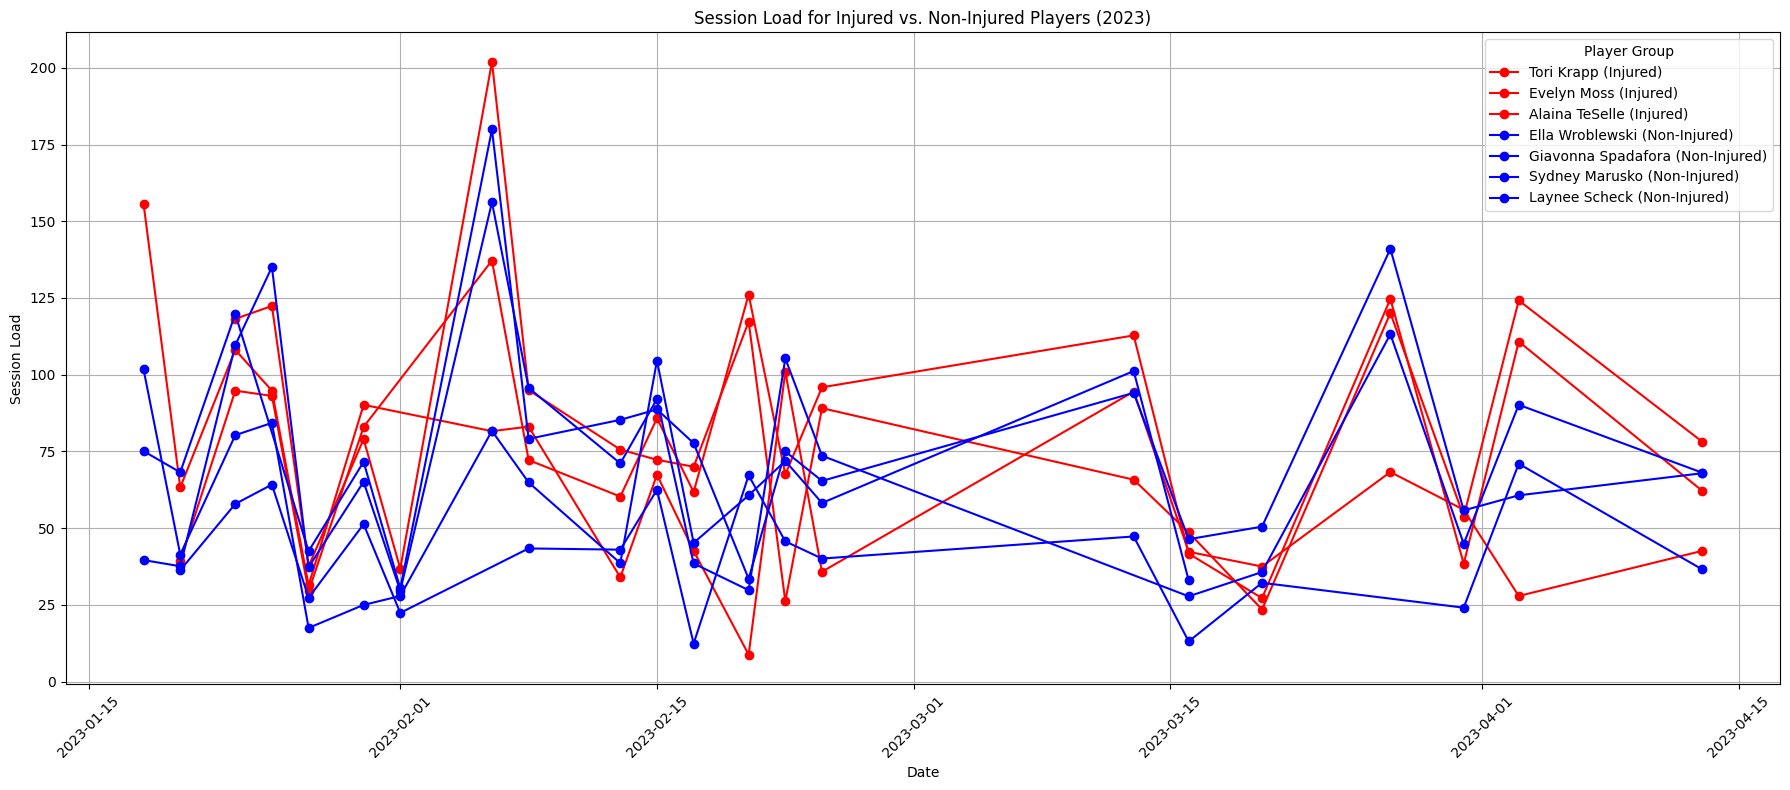

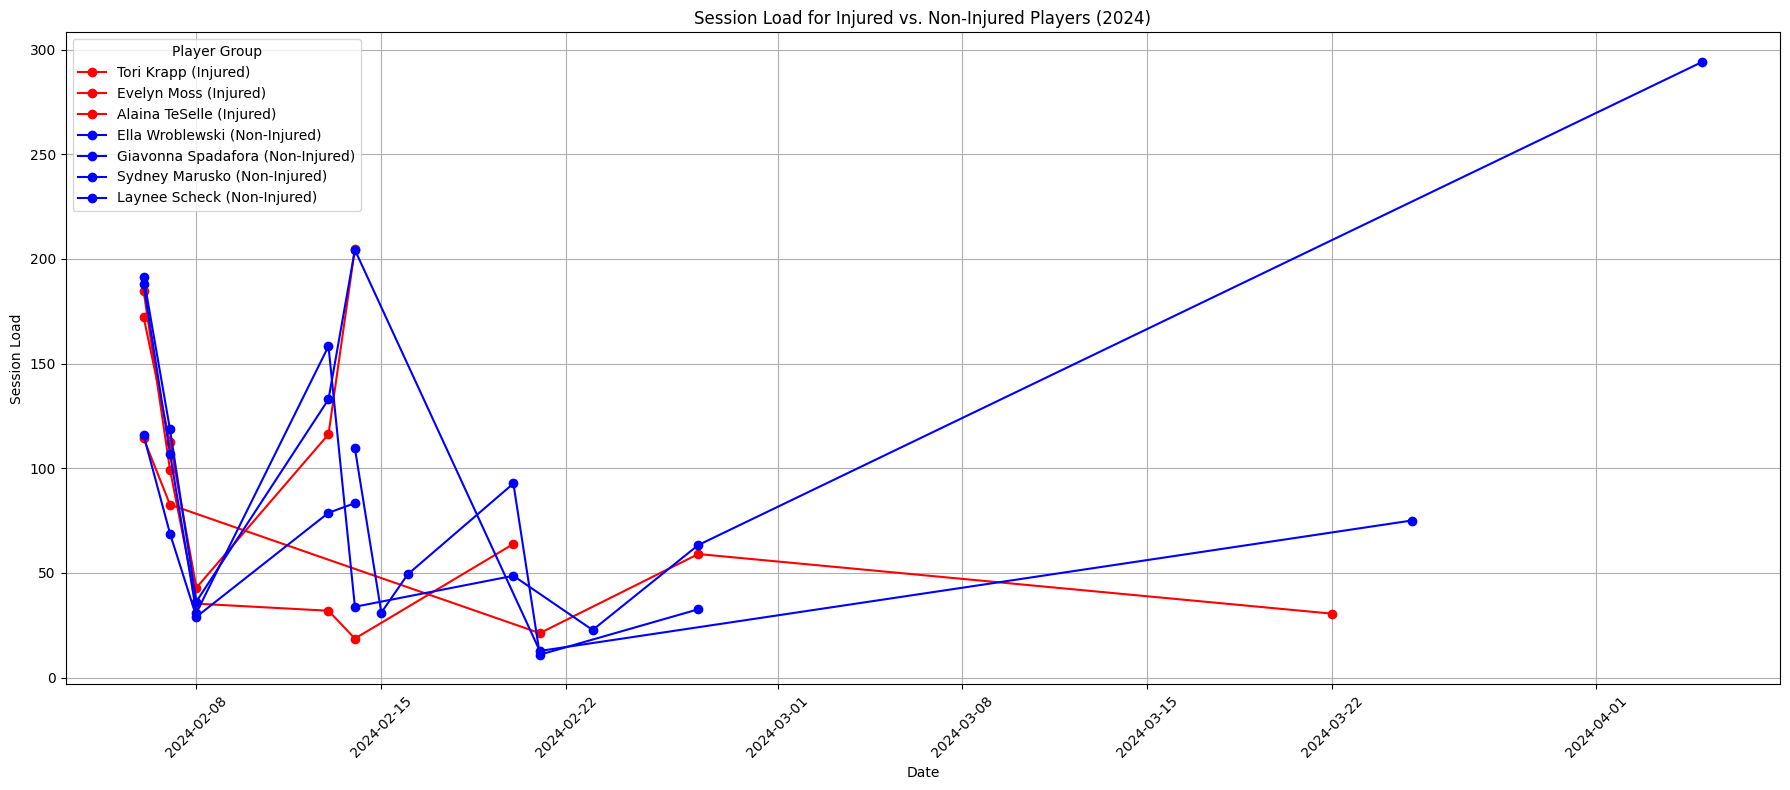

In [44]:
# Separate the plots by year for injured and non-injured players

# Define the groups
injured_players = ['Tori Krapp', 'Evelyn Moss', 'Alaina TeSelle']
non_injured_players = ['Ella Wroblewski', 'Giavonna Spadafora', 'Sydney Marusko', 'Laynee Scheck']

# 2023 Data
plt.figure(figsize=(18, 8))

# Plot for injured players in 2023
for player in injured_players:
    player_data = data_2023_focused[data_2023_focused['name'] == player]
    plt.plot(player_data['date'], player_data['Session Load'], marker='o', linestyle='-', label=f'{player} (Injured)', color='red')

# Plot for non-injured players in 2023
for player in non_injured_players:
    player_data = data_2023_focused[data_2023_focused['name'] == player]
    plt.plot(player_data['date'], player_data['Session Load'], marker='o', linestyle='-', label=f'{player} (Non-Injured)', color='blue')

# Customize the plot
plt.title('Session Load for Injured vs. Non-Injured Players (2023)')
plt.xlabel('Date')
plt.ylabel('Session Load')
plt.xticks(rotation=45)
plt.legend(title='Player Group')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2024 Data
plt.figure(figsize=(18, 8))

# Plot for injured players in 2024
for player in injured_players:
    player_data = data_2024_focused[data_2024_focused['name'] == player]
    plt.plot(player_data['date'], player_data['Session Load'], marker='o', linestyle='-', label=f'{player} (Injured)', color='red')

# Plot for non-injured players in 2024
for player in non_injured_players:
    player_data = data_2024_focused[data_2024_focused['name'] == player]
    plt.plot(player_data['date'], player_data['Session Load'], marker='o', linestyle='-', label=f'{player} (Non-Injured)', color='blue')

# Customize the plot
plt.title('Session Load for Injured vs. Non-Injured Players (2024)')
plt.xlabel('Date')
plt.ylabel('Session Load')
plt.xticks(rotation=45)
plt.legend(title='Player Group')
plt.grid(True)
plt.tight_layout()
plt.show()

The session loads appear to be the same for injured vs. noninjured athletes.

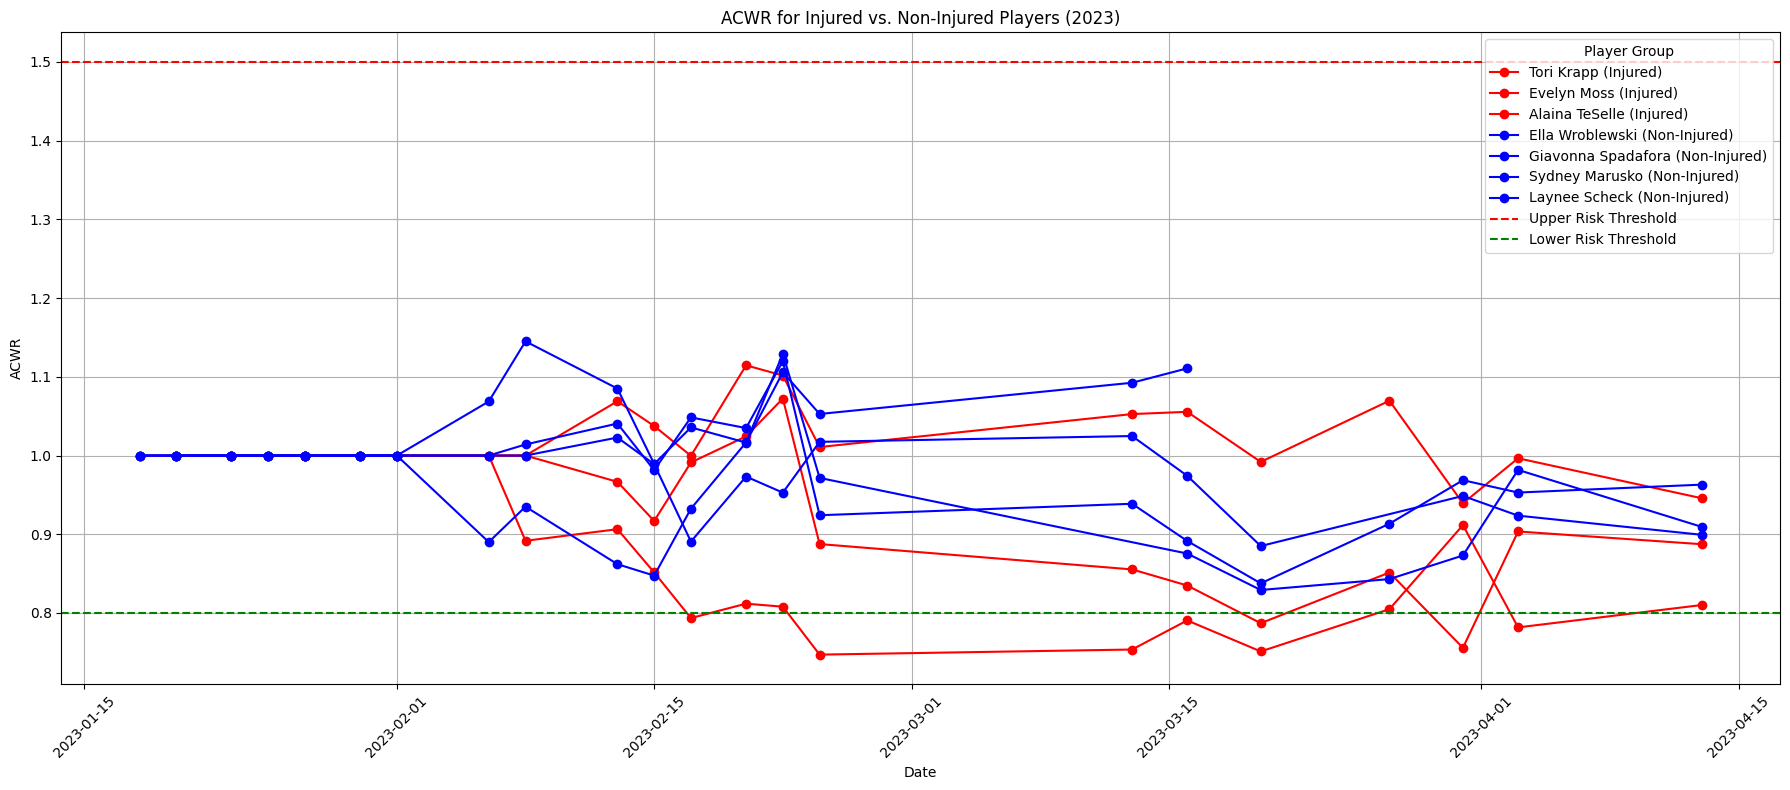

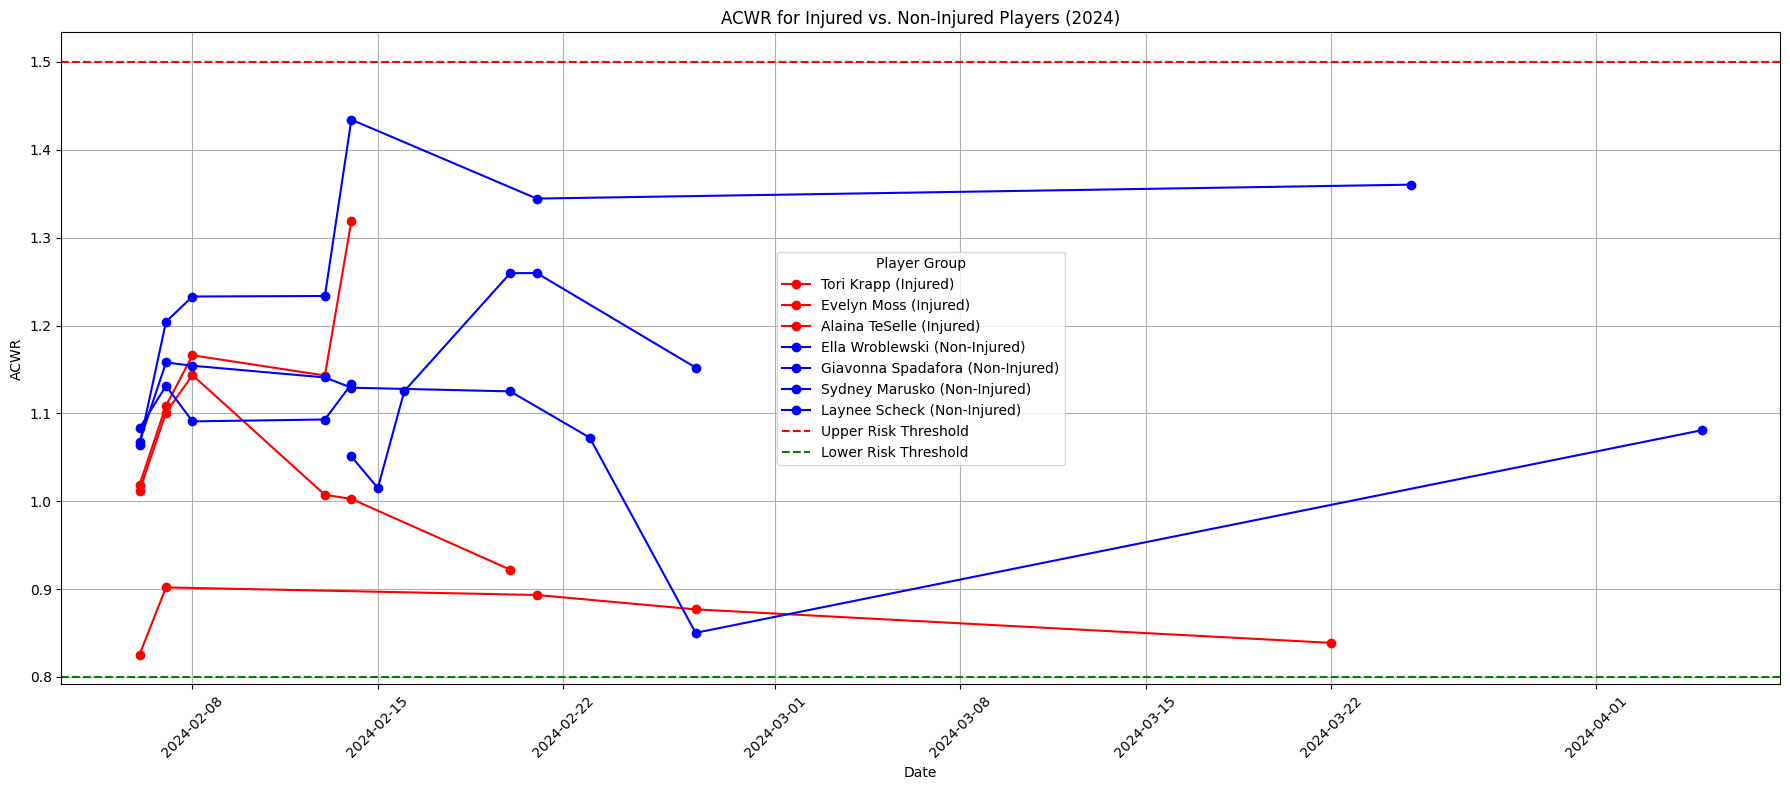

In [45]:
# Separate the plots for ACWR by year for injured and non-injured players

# 2023 Data
plt.figure(figsize=(18, 8))

# Plot for injured players in 2023
for player in injured_players:
    player_data = data_2023_focused[data_2023_focused['name'] == player]
    plt.plot(player_data['date'], player_data['ACWR'], marker='o', linestyle='-', label=f'{player} (Injured)', color='red')

# Plot for non-injured players in 2023
for player in non_injured_players:
    player_data = data_2023_focused[data_2023_focused['name'] == player]
    plt.plot(player_data['date'], player_data['ACWR'], marker='o', linestyle='-', label=f'{player} (Non-Injured)', color='blue')

# Customize the plot
plt.title('ACWR for Injured vs. Non-Injured Players (2023)')
plt.xlabel('Date')
plt.ylabel('ACWR')
plt.xticks(rotation=45)
plt.axhline(y=1.5, color='r', linestyle='--', label='Upper Risk Threshold')
plt.axhline(y=0.8, color='g', linestyle='--', label='Lower Risk Threshold')
plt.legend(title='Player Group')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2024 Data
plt.figure(figsize=(18, 8))

# Plot for injured players in 2024
for player in injured_players:
    player_data = data_2024_focused[data_2024_focused['name'] == player]
    plt.plot(player_data['date'], player_data['ACWR'], marker='o', linestyle='-', label=f'{player} (Injured)', color='red')

# Plot for non-injured players in 2024
for player in non_injured_players:
    player_data = data_2024_focused[data_2024_focused['name'] == player]
    plt.plot(player_data['date'], player_data['ACWR'], marker='o', linestyle='-', label=f'{player} (Non-Injured)', color='blue')

# Customize the plot
plt.title('ACWR for Injured vs. Non-Injured Players (2024)')
plt.xlabel('Date')
plt.ylabel('ACWR')
plt.xticks(rotation=45)
plt.axhline(y=1.5, color='r', linestyle='--', label='Upper Risk Threshold')
plt.axhline(y=0.8, color='g', linestyle='--', label='Lower Risk Threshold')
plt.legend(title='Player Group')
plt.grid(True)
plt.tight_layout()
plt.show()

We also see the ACWR to also be similar for the injured vs. noninjured athletes.

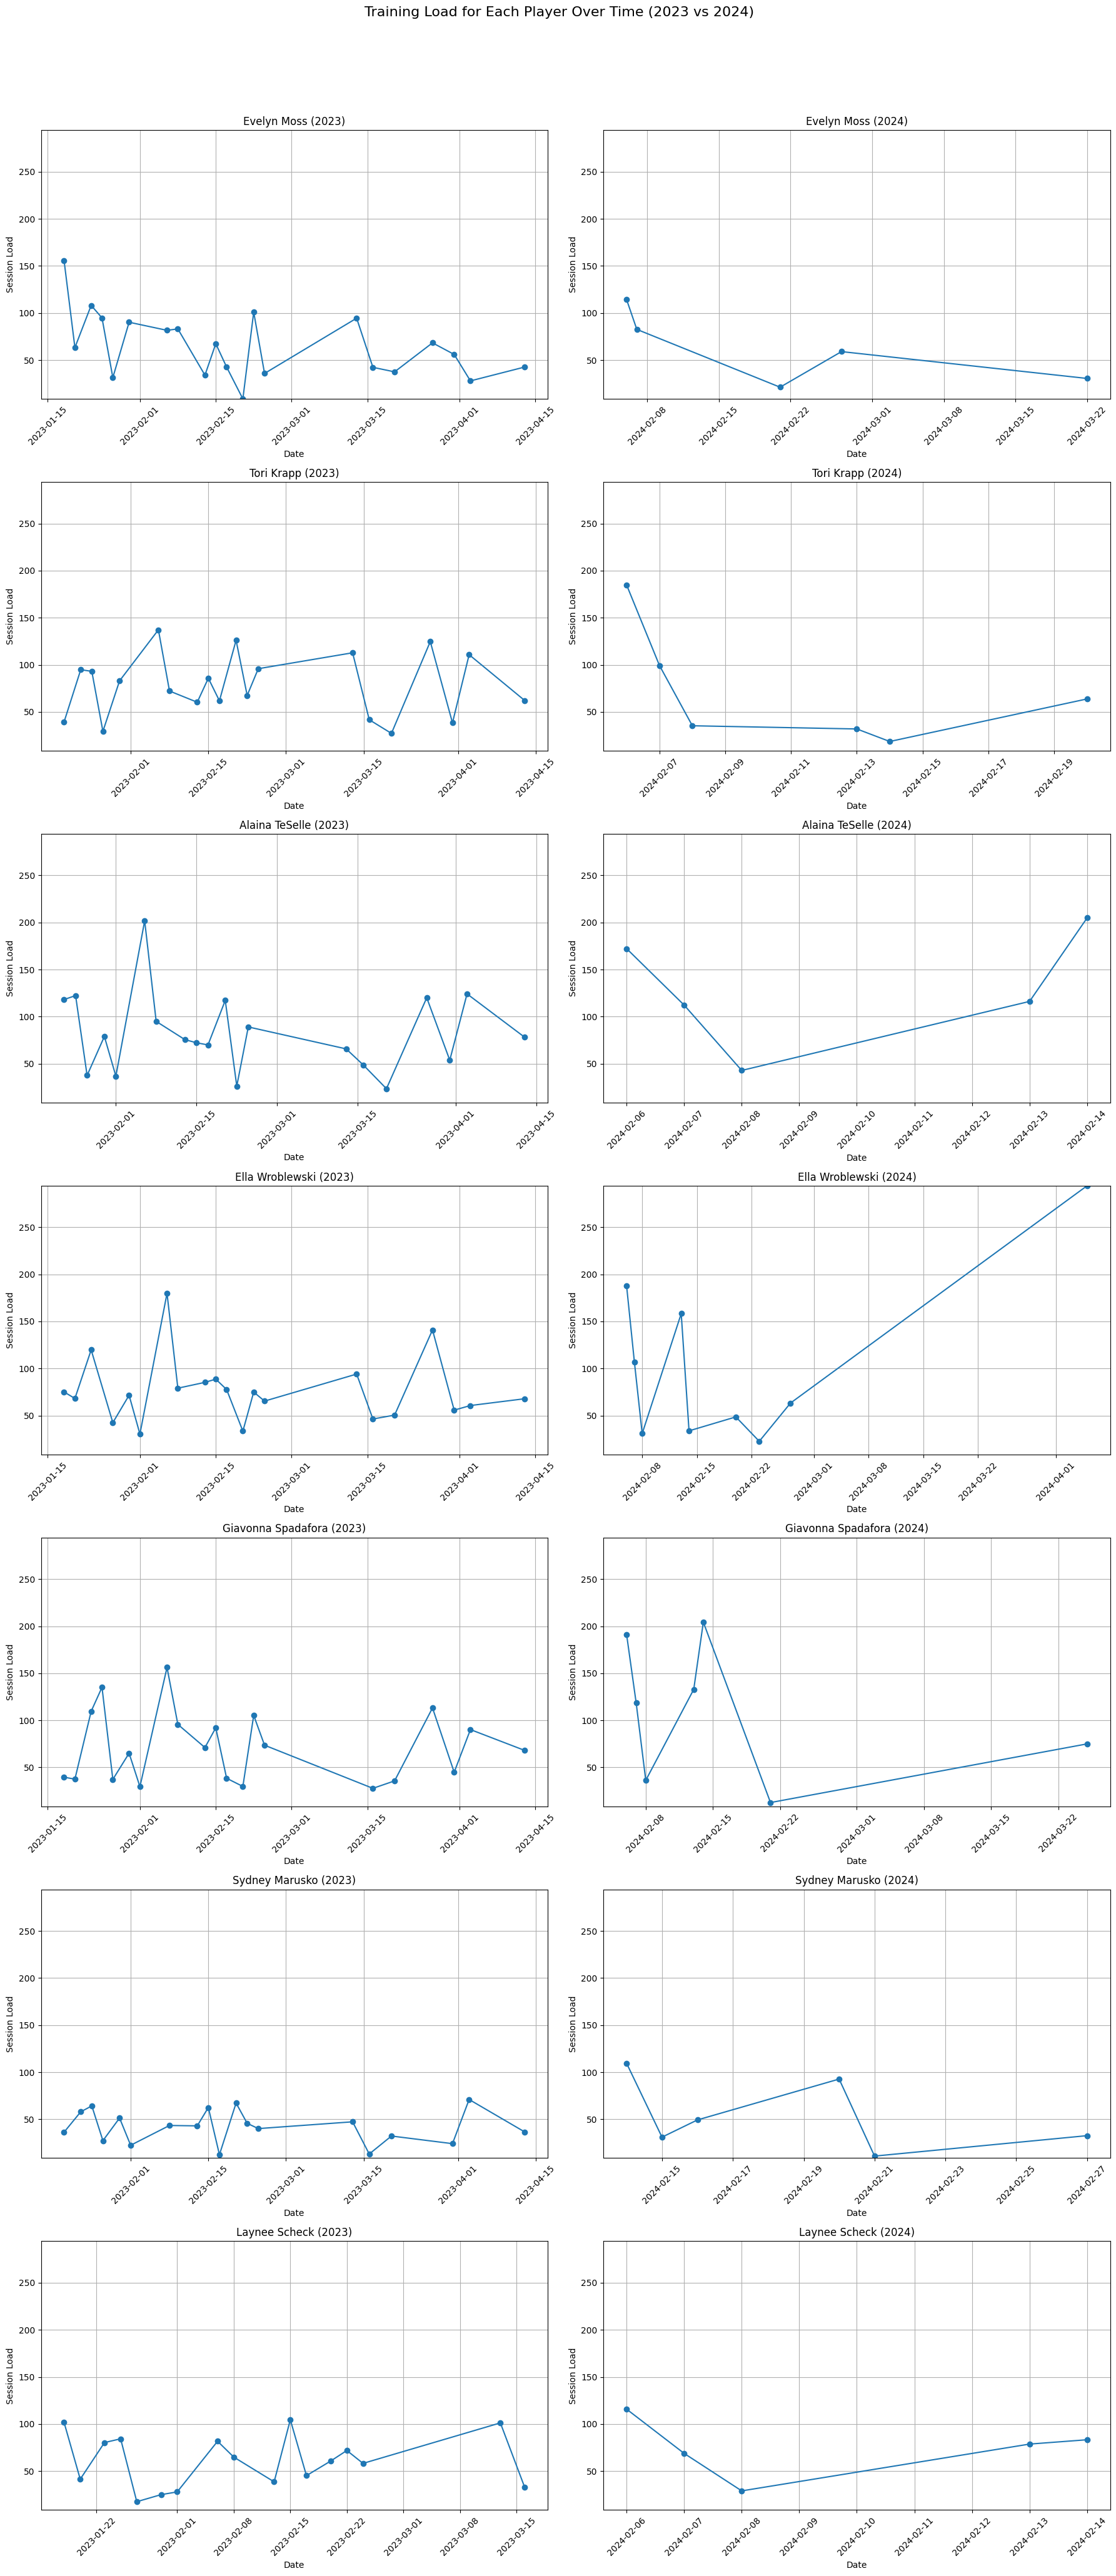

In [46]:
# Set up the plots side by side for 2023 and 2024 with consistent y-axis scale
fig, axes = plt.subplots(len(focused_players), 2, figsize=(18, len(focused_players) * 6))
fig.suptitle('Training Load for Each Player Over Time (2023 vs 2024)', fontsize=16)

# Determine the global y-axis range
global_y_min = min(data_2023_focused['Session Load'].min(), data_2024_focused['Session Load'].min())
global_y_max = max(data_2023_focused['Session Load'].max(), data_2024_focused['Session Load'].max())

for idx, player in enumerate(focused_players):
    # 2023 Data
    player_data_2023 = data_2023_focused[data_2023_focused['name'] == player]
    axes[idx, 0].plot(player_data_2023['date'], player_data_2023['Session Load'], marker='o', linestyle='-')
    axes[idx, 0].set_title(f'{player} (2023)', fontsize=12)
    axes[idx, 0].set_xlabel('Date')
    axes[idx, 0].set_ylabel('Session Load')
    axes[idx, 0].set_ylim(global_y_min, global_y_max)  # Apply consistent y-axis scale
    axes[idx, 0].tick_params(axis='x', rotation=45)
    axes[idx, 0].grid(True)

    # 2024 Data
    player_data_2024 = data_2024_focused[data_2024_focused['name'] == player]
    axes[idx, 1].plot(player_data_2024['date'], player_data_2024['Session Load'], marker='o', linestyle='-')
    axes[idx, 1].set_title(f'{player} (2024)', fontsize=12)
    axes[idx, 1].set_xlabel('Date')
    axes[idx, 1].set_ylabel('Session Load')
    axes[idx, 1].set_ylim(global_y_min, global_y_max)  # Apply consistent y-axis scale
    axes[idx, 1].tick_params(axis='x', rotation=45)
    axes[idx, 1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
plt.show()

Now look at how the ACWR relates to these training loads

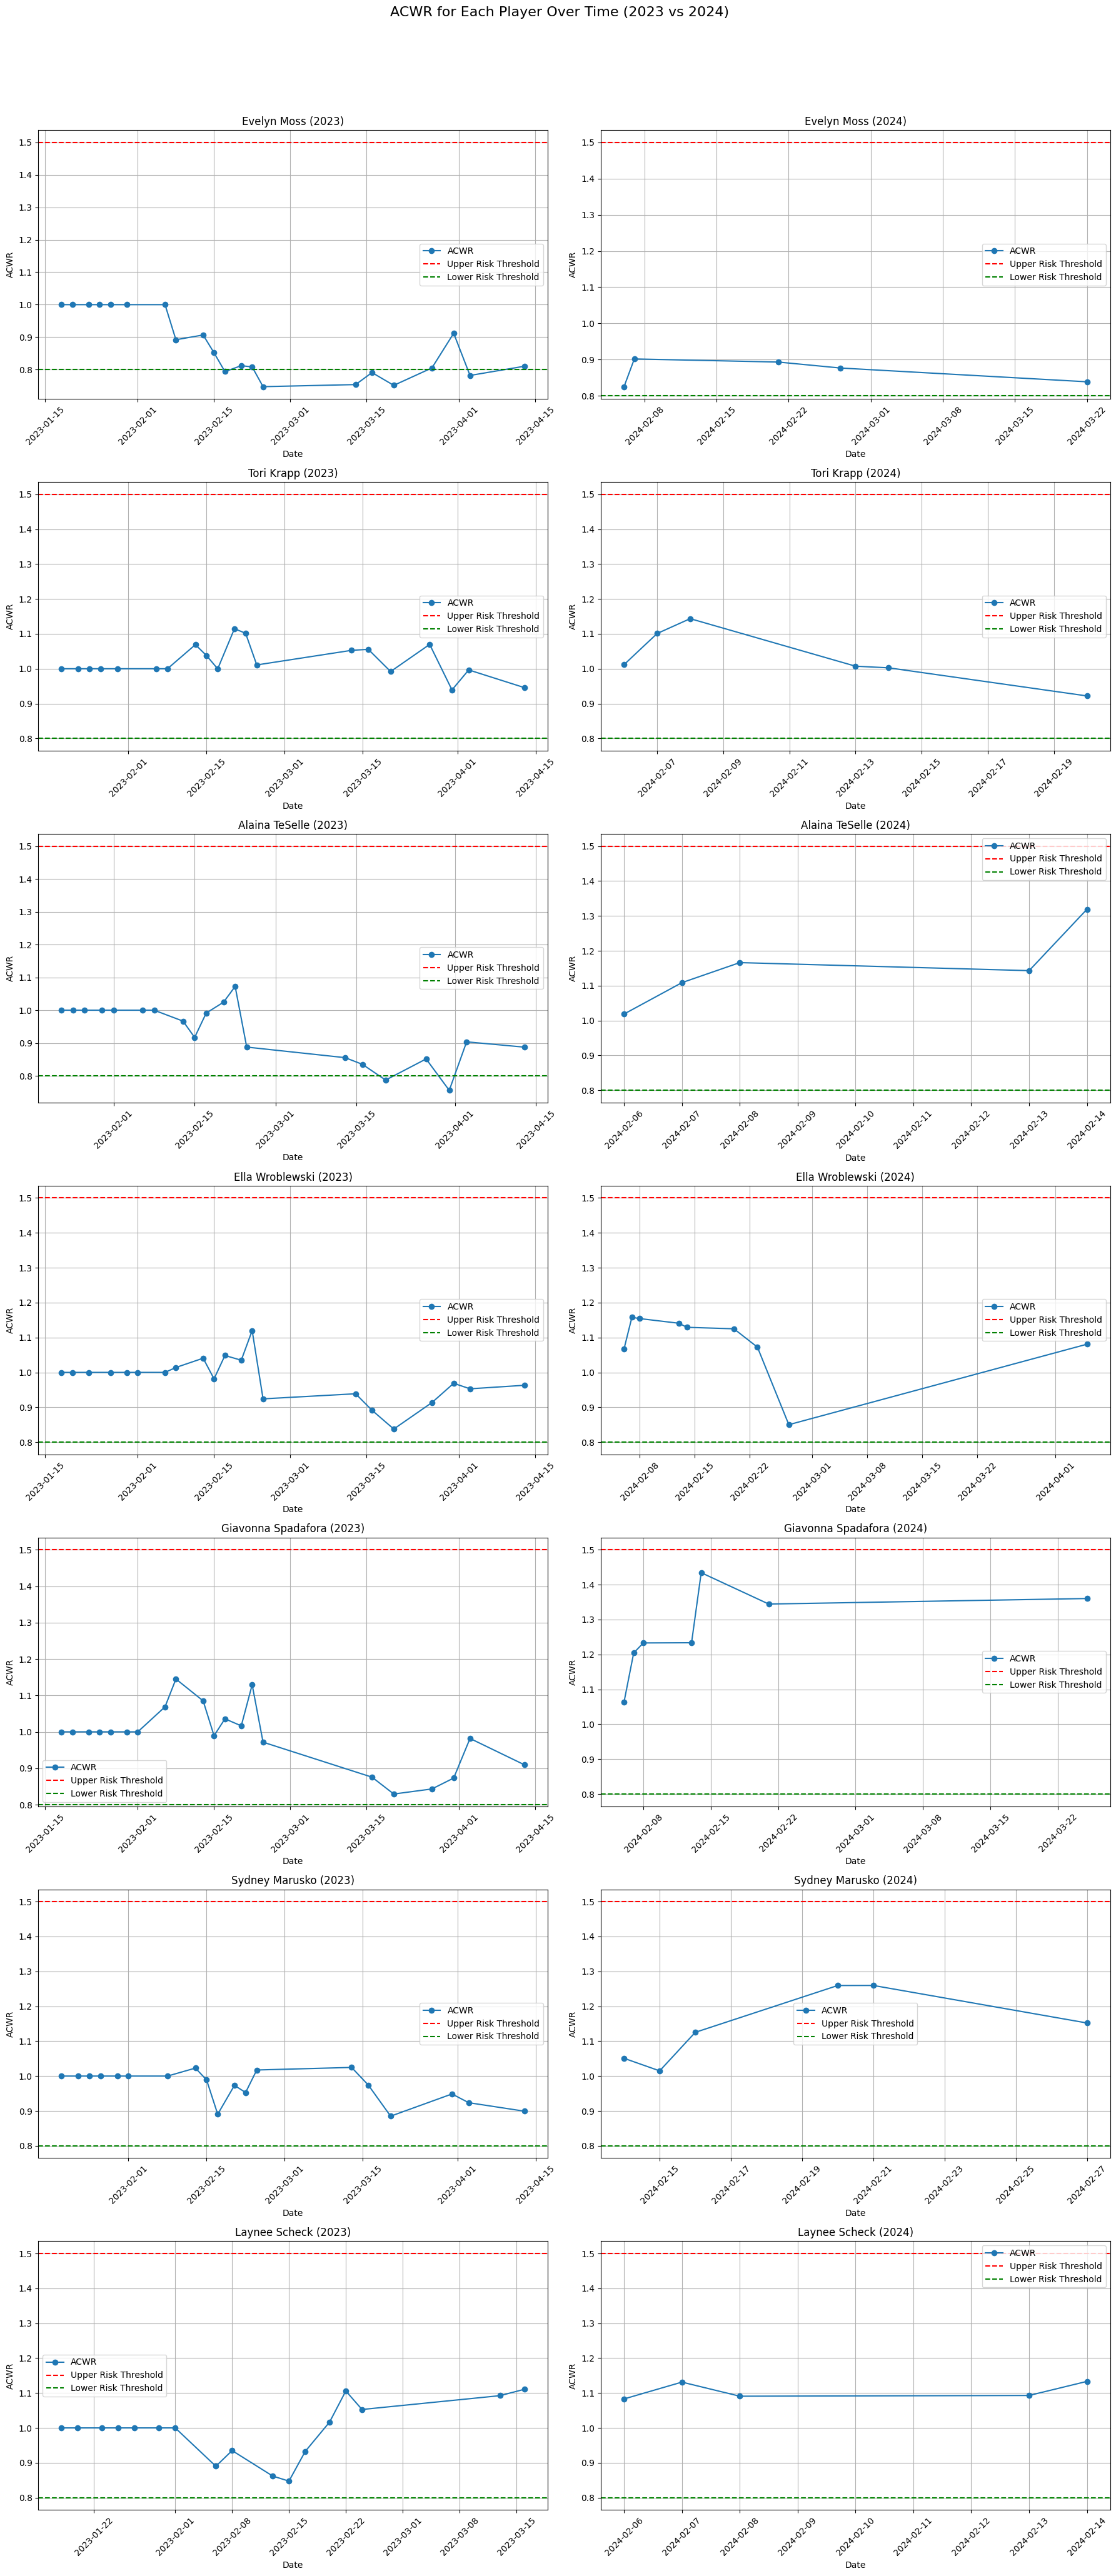

In [47]:
# Recreate the ACWR plots for each player by year
fig, axes = plt.subplots(len(focused_players), 2, figsize=(18, len(focused_players) * 6))
fig.suptitle('ACWR for Each Player Over Time (2023 vs 2024)', fontsize=16)

for idx, player in enumerate(focused_players):
    # 2023 Data
    player_data_2023 = data_2023_focused[data_2023_focused['name'] == player]
    axes[idx, 0].plot(player_data_2023['date'], player_data_2023['ACWR'], marker='o', linestyle='-', label='ACWR')
    axes[idx, 0].axhline(y=1.5, color='r', linestyle='--', label='Upper Risk Threshold')
    axes[idx, 0].axhline(y=0.8, color='g', linestyle='--', label='Lower Risk Threshold')
    axes[idx, 0].set_title(f'{player} (2023)', fontsize=12)
    axes[idx, 0].set_xlabel('Date')
    axes[idx, 0].set_ylabel('ACWR')
    axes[idx, 0].tick_params(axis='x', rotation=45)
    axes[idx, 0].grid(True)
    axes[idx, 0].legend()

    # 2024 Data
    player_data_2024 = data_2024_focused[data_2024_focused['name'] == player]
    axes[idx, 1].plot(player_data_2024['date'], player_data_2024['ACWR'], marker='o', linestyle='-', label='ACWR')
    axes[idx, 1].axhline(y=1.5, color='r', linestyle='--', label='Upper Risk Threshold')
    axes[idx, 1].axhline(y=0.8, color='g', linestyle='--', label='Lower Risk Threshold')
    axes[idx, 1].set_title(f'{player} (2024)', fontsize=12)
    axes[idx, 1].set_xlabel('Date')
    axes[idx, 1].set_ylabel('ACWR')
    axes[idx, 1].tick_params(axis='x', rotation=45)
    axes[idx, 1].grid(True)
    axes[idx, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
plt.show()

I did see from previous analysis that there are predictions that can be developed based on the data collected to understand the training load. That traditionally makes sense because as distance traveled increases, so does the training load. We can also see that there are some predictability that can be gathered on the training load based on the PCA of the other predictors. There are relatively unique sessions that cause different training loads such as speed focused, distance focused, etc. Those are interesting insights for future analysis. 

# Statistical Significance

ANOVA for training load and ACWR for each player.

In [48]:
# Calculate the average ACWR for each player in 2023 and 2024
acwr_avg_2023 = data_2023_focused.groupby('name')['ACWR'].mean()
acwr_avg_2024 = data_2024_focused.groupby('name')['ACWR'].mean()

# Display the average ACWR for each player in 2023 and 2024 in a dataframe
acwr_avg_summary = pd.DataFrame({
    'Average ACWR (2023)': acwr_avg_2023,
    'Average ACWR (2024)': acwr_avg_2024
})
acwr_avg_summary

Average ACWR (2023)  Average ACWR (2024)
name                                                        
Alaina TeSelle                 0.936731             1.151107
Ella Wroblewski                0.982374             1.086442
Evelyn Moss                    0.876851             0.867174
Giavonna Spadafora             0.988252             1.267695
Laynee Scheck                  0.990923             1.106300
Sydney Marusko                 0.973796             1.143767
Tori Krapp                     1.019235             1.031326

In [49]:
# Calculate the average session load for each player in 2023 and 2024
session_load_avg_2023 = data_2023_focused.groupby('name')['Session Load'].mean()
session_load_avg_2024 = data_2024_focused.groupby('name')['Session Load'].mean()

# Display the average session load for each player in 2023 and 2024 in a dataframe
session_load_avg_summary = pd.DataFrame({
    'Average Session Load (2023)' : session_load_avg_2023,
    'Average Session Load (2024)' : session_load_avg_2024
})
session_load_avg_summary

Average Session Load (2023)  Average Session Load (2024)
name                                                                        
Alaina TeSelle                        82.780000                   129.720000
Ella Wroblewski                       76.600000                   105.177778
Evelyn Moss                           65.085714                    61.520000
Giavonna Spadafora                    71.242857                   110.142857
Laynee Scheck                         61.064706                    75.120000
Sydney Marusko                        42.000000                    54.333333
Tori Krapp                            78.215000                    72.300000

First looking at the one-way ANOVA test for the difference in the averages of the session loads in injured vs. noninjured athletes.

In [50]:
# Loading the ANOVA package for one-way ANOVA test
from scipy.stats import f_oneway

# Filter the data for the injured and non-injured players in 2023
injured_players_2023 = data_2023_focused[data_2023_focused['name'].isin(injured_players)]
non_injured_players_2023 = data_2023_focused[data_2023_focused['name'].isin(non_injured_players)]

# Filter the data for the  injured and non-injured players in 2024
injured_players_2024 = data_2024_focused[data_2024_focused['name'].isin(injured_players)]
non_injured_players_2024 = data_2024_focused[data_2024_focused['name'].isin(non_injured_players)]

# Perform ANOVA test for 2023 Session Load
anova_2023 = f_oneway(injured_players_2023['Session Load'], non_injured_players_2023['Session Load'])

# Perform ANOVA test for 2024 Session Load
anova_2024 = f_oneway(injured_players_2024['Session Load'], non_injured_players_2024['Session Load'])

# Display results in dataframe
anova_results = pd.DataFrame({
    "Year": [2023, 2024],
    "F-statistic": [anova_2023.statistic, anova_2024.statistic],
    "p-value": [anova_2023.pvalue, anova_2024.pvalue]
})
anova_results

Year  F-statistic   p-value
0  2023     3.869605  0.051189
1  2024     0.017060  0.896720

There appears to be a significant difference with a p-value below 0.05 in the 2023 group. That is interesting since I didn't expect to see a difference between the two groups. However, the 2024 group went as expected for the results. Look at the values for the Session Load averages to showcase how much of a difference there is between the injured vs. non-injured.

In [51]:
# Make a dataframe of the Session Load for injured vs non-injured players in 2023 and 2024
session_load_comparison = pd.DataFrame({
    "Year": [2023, 2023, 2024, 2024],
    "Player Group": ["Injured", "Non-Injured", "Injured", "Non-Injured"],
    "Session Load": [
        injured_players_2023['Session Load'].mean(),
        non_injured_players_2023['Session Load'].mean(),
        injured_players_2024['Session Load'].mean(),
        non_injured_players_2024['Session Load'].mean()
    ]
})
session_load_comparison

Year Player Group  Session Load
0  2023      Injured     75.191803
1  2023  Non-Injured     63.343590
2  2024      Injured     86.875000
3  2024  Non-Injured     89.600000

There was slightly an increase in the session load from 2023 for the injured athletes. This is intersting to take into consideration. Perform a post-hoc tukey test now.

In [52]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey HSD test for 2023
tukey_2023 = pairwise_tukeyhsd(endog=data_2023_focused['Session Load'], groups=data_2023_focused['name'], alpha=0.05)

# Perform Tukey HSD test for 2024
tukey_2024 = pairwise_tukeyhsd(endog=data_2024_focused['Session Load'], groups=data_2024_focused['name'], alpha=0.05)

# Display the results for 2023
print("Tukey HSD Test Results for 2023:")
print(tukey_2023)

Tukey HSD Test Results for 2023:
             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------------------
    Alaina TeSelle    Ella Wroblewski    -6.18 0.9973 -38.0209 25.6609  False
    Alaina TeSelle        Evelyn Moss -17.6943 0.6411 -49.5352 14.1466  False
    Alaina TeSelle Giavonna Spadafora -11.5371 0.9315 -43.3781 20.3038  False
    Alaina TeSelle      Laynee Scheck -21.7153 0.4617 -55.3339 11.9033  False
    Alaina TeSelle     Sydney Marusko   -40.78  0.005 -73.4282 -8.1318   True
    Alaina TeSelle         Tori Krapp   -4.565 0.9995 -36.7919 27.6619  False
   Ella Wroblewski        Evelyn Moss -11.5143 0.9282 -42.9645 19.9359  False
   Ella Wroblewski Giavonna Spadafora  -5.3571 0.9987 -36.8074 26.0931  False
   Ella Wroblewski      Laynee Scheck -15.5353 0.8015 -48.7841 17.7135  False
   Ella Wroblewski     Sydney M

- There were only some pairwise differences that were significant enough. 
- These were Alaina TeSelle, Sydney Marsuko; Ella Wroblewski, Sydney Marusko; Sydney Marusko, Tori Krapp. 
    - Alaina was injured and Sydney wasn't. That showcases one that was clearly different and an injured result happened. The mean difference is negative indicating Sydney must have had lower training load cnotributing to the result since Alaina was injured.
    - Ella and Sydney, however, weren't injured and theirs were significantly different. This isn't helpful for what we are looking for. Showcasing that potentially one of these individuals could be an outlier messing with the results. this might be Sydney since it is significantly lower again.
    - Finally, Tori and Sydney were significantly different and Sydney once again was lower. This could contribute that since Tori was injured, we can understand the higher session loads to potentially increase injury risk.

In [53]:
# Display the Tukey HSD for 2024
print("\nTukey HSD Test Results for 2024:")
print(tukey_2024)


Tukey HSD Test Results for 2024:
              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
      group1             group2       meandiff p-adj    lower    upper   reject
-------------------------------------------------------------------------------
    Alaina TeSelle    Ella Wroblewski -24.5422 0.9931 -137.6432  88.5587  False
    Alaina TeSelle        Evelyn Moss    -68.2 0.6459 -196.4444  60.0444  False
    Alaina TeSelle Giavonna Spadafora -19.5771 0.9985 -138.3084  99.1541  False
    Alaina TeSelle      Laynee Scheck    -54.6  0.834 -182.8444  73.6444  False
    Alaina TeSelle     Sydney Marusko -75.3867 0.4833 -198.1713   47.398  False
    Alaina TeSelle         Tori Krapp   -57.42  0.766 -180.2047  65.3647  False
   Ella Wroblewski        Evelyn Moss -43.6578 0.8878 -156.7587  69.4432  False
   Ella Wroblewski Giavonna Spadafora   4.9651    1.0  -97.2225 107.1527  False
   Ella Wroblewski      Laynee Scheck -30.0578 0.9802 -143.1587  83.0432  False
   Ell

2024 even showcased that there were no significant pairwise differences for any of the athletes. This showcases that everyone had similar session load most of the time. 

Now look at the ACWR differences in ANOVA.

In [54]:
# Loading the ANOVA package for one-way ANOVA test
from scipy.stats import f_oneway

# Filter the data for the injured and non-injured players in 2023
injured_players_2023 = data_2023_focused[data_2023_focused['name'].isin(injured_players)]
non_injured_players_2023 = data_2023_focused[data_2023_focused['name'].isin(non_injured_players)]

# Filter the data for the injured and non-injured players in 2024
injured_players_2024 = data_2024_focused[data_2024_focused['name'].isin(injured_players)]
non_injured_players_2024 = data_2024_focused[data_2024_focused['name'].isin(non_injured_players)]

# Perform ANOVA test for 2023
anova_2023 = f_oneway(injured_players_2023['ACWR'], non_injured_players_2023['ACWR'])

# Perform ANOVA test for 2024
anova_2024 = f_oneway(injured_players_2024['ACWR'], non_injured_players_2024['ACWR'])

# Display results in dataframe
anova_results = pd.DataFrame({
    "Year": [2023, 2024],
    "F-statistic": [anova_2023.statistic, anova_2024.statistic],
    "p-value": [anova_2023.pvalue, anova_2024.pvalue]
})
anova_results

Year  F-statistic   p-value
0  2023     8.174637  0.004913
1  2024    11.151891  0.001796

Interestingly, there is a significant differences in the ACWR averages from the injured vs. non-injured group. Let's look at the averages in relation to one another through a dataframe.

In [55]:
# Make a dataframe of the ACWR for the injured vs. non-injured players in 2023 and 2024
acwr_injured_vs_noninjured = pd.DataFrame({
    "Year": [2023, 2024],
    "Injured Players": [injured_players_2023['ACWR'].mean(), injured_players_2024['ACWR'].mean()],
    "Non-Injured Players": [non_injured_players_2023['ACWR'].mean(), non_injured_players_2024['ACWR'].mean()]
})
acwr_injured_vs_noninjured

Year  Injured Players  Non-Injured Players
0  2023         0.943167              0.98373
1  2024         1.017460              1.14985

This does showcase that there is a significant difference, but not in the way that we would have hoped. Interestingly, the players with injuries had smaller ACWRs than the players without injuries. Therefore, we are beginning to see that the ACWR value wasn't very helpful for this study. However, there were very small sample sizes in the data collected and the players with injuries. So, that could contribute some bias to the study.

In [56]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey HSD test for 2023
tukey_2023 = pairwise_tukeyhsd(endog=data_2023_focused['ACWR'], groups=data_2023_focused['name'], alpha=0.05)

# Perform Tukey HSD test for 2024
tukey_2024 = pairwise_tukeyhsd(endog=data_2024_focused['ACWR'], groups=data_2024_focused['name'], alpha=0.05)

# Display the results for 2023
print("Tukey HSD Test Results for 2023:")
print(tukey_2023)

Tukey HSD Test Results for 2023:
            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
    Alaina TeSelle    Ella Wroblewski   0.0456 0.4437  -0.024  0.1153  False
    Alaina TeSelle        Evelyn Moss  -0.0599 0.1425 -0.1295  0.0098  False
    Alaina TeSelle Giavonna Spadafora   0.0515 0.2948 -0.0181  0.1212  False
    Alaina TeSelle      Laynee Scheck   0.0542 0.2992 -0.0194  0.1277  False
    Alaina TeSelle     Sydney Marusko   0.0371 0.7116 -0.0344  0.1085  False
    Alaina TeSelle         Tori Krapp   0.0825 0.0109   0.012   0.153   True
   Ella Wroblewski        Evelyn Moss  -0.1055 0.0002 -0.1743 -0.0367   True
   Ella Wroblewski Giavonna Spadafora   0.0059    1.0 -0.0629  0.0747  False
   Ella Wroblewski      Laynee Scheck   0.0085 0.9998 -0.0642  0.0813  False
   Ella Wroblewski     Sydney Marusko  -0.0

- Initially, we saw that there were significant differences in the values of the ACWR between  the injured vs. noninjured in their averages. However, there is some possibility that is related to the overall averages, so it helps to once again look at the Tukey HSD to see the pairwise differences that are evident to really understand if there is a relationship between the ACWR predicting injured athletes.
- The pairwise differences that were significant here were Alaina TeSelle, Tori Krapp; Ella Wroblewski, Evelyn Moss; Evelyn Moss, Giavonna Spadafora; Evelyn Moss, Laynee Scheck; Evelyn Moss, Sydney Marusko; Evelyn Moss, Tori Krapp
    - Alaina and Tori were both injured so that is disappointing that they have significantly different ACWR indicating that one or both may be outliers. Alaina appeared to be much lower than Tori.
    - Ella wasn't injured and Evelyn was. The mean difference showcases that Evelyn had lower ACWR which doesn't contribute to the goal of the predictability of ACWR and injuries.
    - Evelyn was injured and Giavonna wasn't. Once again Evelyn had lower ACWR.
    - Evelyn was injured and Laynee wasn't. Once again Evelyn had lower ACWR.
    - Evelyn was injured and Sydney wasn't. Once again Evelyn had lower ACWR.
    - Evelyn was injured and Tori was as well. Evelyn had a lower ACWR, which doesn't help us then for the differences.
- We might consider Evelyn's value to be an outlier. However, the small sample sizes don't help with the data. 

In [57]:
# Display the Tukey HSD results for 2024
print("Tukey HSD Test Results for 2024:")
print(tukey_2024)

Tukey HSD Test Results for 2024:
            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
    Alaina TeSelle    Ella Wroblewski  -0.0647 0.8617 -0.2238  0.0945  False
    Alaina TeSelle        Evelyn Moss  -0.2839 0.0004 -0.4644 -0.1035   True
    Alaina TeSelle Giavonna Spadafora   0.1166 0.3321 -0.0505  0.2836  False
    Alaina TeSelle      Laynee Scheck  -0.0448  0.986 -0.2253  0.1356  False
    Alaina TeSelle     Sydney Marusko  -0.0073    1.0 -0.1801  0.1654  False
    Alaina TeSelle         Tori Krapp  -0.1198 0.3396 -0.2925   0.053  False
   Ella Wroblewski        Evelyn Moss  -0.2193 0.0022 -0.3784 -0.0601   True
   Ella Wroblewski Giavonna Spadafora   0.1813 0.0061  0.0375   0.325   True
   Ella Wroblewski      Laynee Scheck   0.0199 0.9997 -0.1393   0.179  False
   Ella Wroblewski     Sydney Marusko   0.0

- Looking again at the Tukey HSD for the pairwise differences in the ACWR averages for 2024 found some interesting significance as well. 
- There were significant differences between Alaina TeSelle, Evelyn Moss; Ella Wroblewski, Evelyn Moss; Ella Wroblewski, Giavonna Spadafora; Evelyn Moss, Giavonna Spadafora; Evelyn Moss, Laynee Scheck; Evelyn Moss, Sydney Marusko; Giavonna Spadafora, Tori Krapp.
    - Alaina and Evelyn were both apart of the injured group unfortunately. It appears that Evelyn had a much lower ACWR value.
    - Ella was non-injured and Evelyn was injured. Therefore, there was a significant difference with Evelyn having a lower ACWR.
    - Ella was non-injured and so was Giavonna. Ella had the lower ACWR.
    - Evelyn was injured and Giavonna wasn't. Evelyn's ACWR was much lower than Giavonna's.
    - Evelyn was injured and Laynee wasn't. Evelyn's ACWR was lower than Laynee's.
    - Evelyn was injured and Sydney wasn't. Evelyn's ACWR was lower than Sydney's.
    - Giavonna wasn't injured but Tori was. Also, Tori had a higher ACWR than Giavonna.
- From the players above for both 2023 and 2024 values, we found that generally the ACWR of the injured was signficantly lower than the ACWR of the non-injured in the pairwise differences. However, the major differences were only showcased in one individual. That individual might be an outlier with lower ACWR based on the timing of the training stimulus that was given to them. With more data samples, we would be able to understand the predictability more clearly.

# Conclusion

Concluding Statements:
- Looking at the relationship between session load and how it computes the ACWR helped to understand some metrics on how hard a training session would be.
- However, there were many more variables at play that caused injuries, and because of our small sample size, there was no way to understand if there was statistically significant differences in the ACWR of the injured vs. non-injured individuals that would indicate ACWR being helpful in understanding injury risk.
- But, the players that were injured had relatively lower ACWR typically on average. That could play a factor in the misleading statistics. 
- Therefore, it is important to understand without samples of more individuals in the injured and non-injured groups, it will be hard to directly understand the relationship.
- Overall, we can conclude that there might still be a relationship but it hasn’t been found yet, and we would need more samples to indicate that as an outcome. Currently, it appears that there are a lot of other factors at play that would affect a person’s injury risk. ACWR may be something that can be included in that prediction, but it doesn’t appear to be the largest indicator or only indicator for that matter.


Based on the analysis of the training load and ACWR data for the lacrosse players, several key points were identified:

1. **Training Load Analysis**:
    - Training loads for injured and non-injured players were similar, suggesting that training load alone may not predict injuries.
    - ANOVA for 2023 indicated a significant difference in session loads between injured and non-injured players, possibly due to outliers or other factors.

2. **ACWR Analysis**:
    - Injured players had lower ACWR values than non-injured players, contrary to expectations.
    - Significant differences in ACWR between injured and non-injured players were found, but these differences were not consistent across all pairwise comparisons.

3. **Multicollinearity and PCA**:
    - High multicollinearity was found among predictor variables, particularly 'Session Active Time (min)' and 'Session Distance (mi)'.
    - PCA reduced multicollinearity, and PCA-based regression models explained 91.4% of the variance in session load.

4. **Predictive Modeling**:
    - Ridge and Lasso regression models using PCA components showed good predictive performance with R-squared values around 0.914.

5. **Player-Specific and Session-Specific Analysis**:
    - Time series plots and PCA score plots tracked training intensity trends over time for individual players.
    - Players with extreme PCA scores were identified and analyzed for training loads and ACWR values.

6. **Cluster Analysis**:
    - K-means clustering on PCA scores grouped sessions into clusters, highlighting different training intensities and session types.

7. **Statistical Significance**:
    - ANOVA and Tukey HSD tests provided insights into the statistical significance of differences in training load and ACWR between injured and non-injured players.
    - Small sample sizes and potential outliers may affect the overall conclusions.

**Recommendations**:
- Continue monitoring training loads and ACWR values, considering additional factors such as individual player characteristics.
- Use PCA and regression models to predict training loads and identify high-risk sessions, validating these models with larger datasets.
- Implement individualized training adjustments based on PCA scores and cluster analysis to optimize training intensity and reduce injury risk.

Overall, predicting injuries based on training load and ACWR values alone is complex. A multifaceted approach considering various factors and using advanced statistical techniques is recommended for better injury prevention and training optimization.
